In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pems_bay_node = np.load("C:/Рабочий стол/Dataset_Traffic/PEMS_BAY/pems_node_values.npy")
pems_bay_adj = np.load("C:/Рабочий стол/Dataset_Traffic/PEMS_BAY/pems_adj_mat.npy")
G = ox.load_graphml("C:/Рабочий стол/Dataset_Traffic/drive.graphml")

In [3]:
pems_bay_adj 

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.9605087,
        0.6060658],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        0.7730252],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]], dtype=float32)

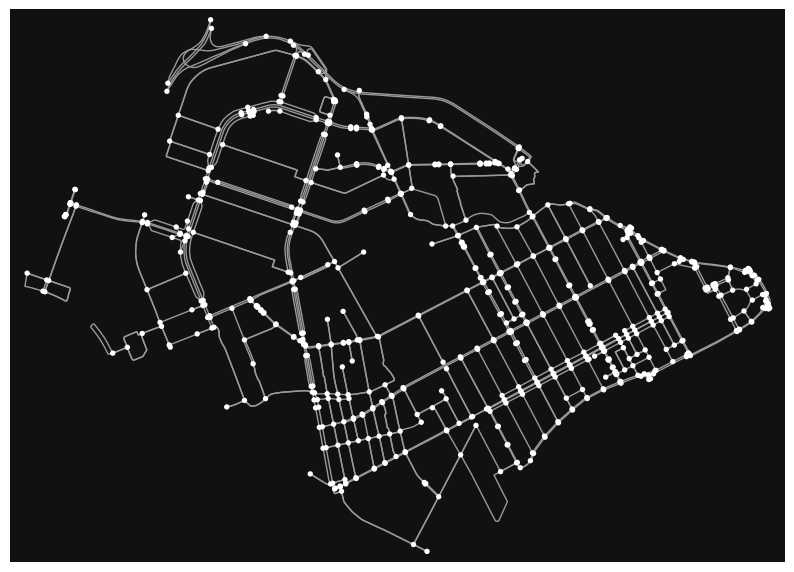

In [4]:
fig, ax = ox.plot_graph(G, figsize=(10,10), close=False, show=False)

In [5]:
node_vo, edges_vo = ox.graph_to_gdfs(G)

In [6]:
edges_vo

osmid  oneway   lanes  \
u           v           key                                           
223631      763448262   0                 192137871    True       2   
763448262   3639158309  0                  60981084    True     NaN   
            1833317419  0    [763743931, 285257335]    True  [2, 3]   
3639158309  3639158308  0                 183951414    True       2   
            763448264   0                 359152338    True       1   
...                                             ...     ...     ...   
10212601282 10212601289 0                1116605703    True       2   
10212601283 10212601282 0                1116605701   False     NaN   
            10212601273 0                1116605704    True       2   
10212601289 10212601290 0                 605081846   False     NaN   
            10212601301 0                1116605703    True       2   

                                              name        highway  maxspeed  \
u           v           key                                                   
223631      763448262   0      набережная Макарова      secondary  RU:urban   
763448262   3639158309  0    Средний проспект В.О.    residential  RU:urban   
            1833317419  0      набережная Макарова      secondary  RU:urban   
3639158309  3639158308  0      набережная Макарова      secondary  RU:urban   
            763448264   0    Средний проспект В.О.    residential  RU:urban   
...                                            ...            ...       ...   
10212601282 10212601289 0     Железноводская улица       tertiary  RU:urban   
10212601283 10212601282 0                      NaN  tertiary_link       NaN   
            10212601273 0     Железноводская улица       tertiary  RU:urban   
10212601289 10212601290 0                      NaN  tertiary_link       NaN   
            10212601301 0     Железноводская улица       tertiary  RU:urban   

                            reversed   length                weight  \
u           v           key                                           
223631      763448262   0      False   21.732  0.052156799999999996   
763448262   3639158309  0      False    6.964             0.0167136   
            1833317419  0      False  242.279    0.5814695999999999   
3639158309  3639158308  0      False   22.209             0.0533016   
            763448264   0      False  125.523             0.3012552   
...                              ...      ...                   ...   
10212601282 10212601289 0      False   33.392             0.0801408   
10212601283 10212601282 0      False    5.980              0.014352   
            10212601273 0      False  104.325               0.25038   
10212601289 10212601290 0       True    5.897             0.0141528   
            10212601301 0      False  231.992             0.5567808   

                            transport_type  \
u           v           key                  
223631      763448262   0            drive   
763448262   3639158309  0            drive   
            1833317419  0            drive   
3639158309  3639158308  0            drive   
            763448264   0            drive   
...                                    ...   
10212601282 10212601289 0            drive   
10212601283 10212601282 0            drive   
            10212601273 0            drive   
10212601289 10212601290 0            drive   
            10212601301 0            drive   

                                                                      geometry  \
u           v           key                                                      
223631      763448262   0    LINESTRING (348611.657 6648539.634, 348592.303...   
763448262   3639158309  0    LINESTRING (348592.303 6648549.669, 348588.653...   
            1833317419  0    LINESTRING (348592.303 6648549.669, 348490.251...   
3639158309  3639158308  0    LINESTRING (348588.653 6648543.720, 348608.410...   
            763448264   0    LINESTRING (348588.653 6648543.720, 348582.420... 

In [7]:
node_vo

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
223631,6.648540e+06,348611.657095,traffic_signals,3,30.289742,59.946379,POINT (348611.657 6648539.634)
763448262,6.648550e+06,348592.302507,traffic_signals,3,30.289389,59.946462,POINT (348592.303 6648549.669)
3639158309,6.648544e+06,348588.652554,traffic_signals,4,30.289328,59.946407,POINT (348588.653 6648543.720)
1833317419,6.648670e+06,348381.529524,NaN,3,30.285532,59.947462,POINT (348381.530 6648669.771)
223633,6.648443e+06,348859.015065,NaN,3,30.294235,59.945603,POINT (348859.015 6648442.978)
...,...,...,...,...,...,...,...
10212601270,6.649303e+06,346988.467791,NaN,3,30.260155,59.952629,POINT (346988.468 6649303.317)
10212601266,6.649310e+06,346983.373102,NaN,3,30.260059,59.952689,POINT (346983.373 6649310.195)
10212601282,6.649303e+06,346620.772395,NaN,3,30.253581,59.952489,POINT (346620.772 6649302.924)


In [8]:
len(pems_bay_node) # Данные за 6 месяцев от 325 сенсоров каждые 5 минут

52105

In [9]:
from datetime import datetime, timedelta

# Define the start time (e.g., midnight)
start_time = datetime(2023, 10, 27, 0, 0)  # Replace with the desired date

# Define the end time (e.g., 11:59 PM)
end_time = datetime(2023, 10, 27, 23, 59)  # Replace with the desired date

# Define the time interval (30 minutes)
time_interval = timedelta(minutes=60)

# Initialize an empty list to store the times
time_list = []

# Generate the list of times with half-hour intervals
current_time = start_time
while current_time <= end_time:
    time_list.append(current_time.strftime('%H:%M'))
    current_time += time_interval

# Display the list of times
time_list = time_list*1

In [10]:
data_day_30min = []
step = 0
speed = 0
for i in range(288*8, 288*9):
    step = step + 1
    speed = speed + pems_bay_node[i][77][0]
    if step == 6:
        data_day_30min.append(speed/6)
        speed = 0
        step = 0
len(data_day_30min)
data_traffic = pd.DataFrame(columns=['speed', 'time'])
data_traffic['speed'] = data_day_30min
data_traffic['time'] = time_list
data_traffic = data_traffic.set_index("time")
data_traffic

ValueError: Length of values (24) does not match length of index (48)

In [ ]:
plt.figure(figsize=(25, 7))
# plotting the "A" column alone
plt.plot(data_traffic)

In [ ]:
node_vo

In [12]:
edges_vo['geometry'].iloc[1]
p1 = []
p2 = []
id_sens = []
for i in range(len(edges_vo)):
    x,y = edges_vo['geometry'].iloc[i].coords.xy
    w = edges_vo['weight'].iloc[i]
    id = i
    x_middle = (x[0]+x[-1])/2
    y_middle = (y[0]+y[-1])/2
    p1.append(x_middle)
    p2.append(y_middle)
    id_sens.append(id)
c = gpd.GeoDataFrame({'id_sens': id_sens, 'LAT_sensor':p1,'LON_sensor':p2})
c['coordinates'] = "[]"
c

,id_sens,LAT_sensor,LON_sensor,coordinates
0,0,348601.979801,6.648545e+06,[]
1,1,348590.477531,6.648547e+06,[]
2,2,348486.916016,6.648610e+06,[]
3,3,348598.531440,6.648539e+06,[]
4,4,348533.946596,6.648513e+06,[]
...,...,...,...,...
1416,1416,346604.021022,6.649303e+06,[]
1417,1417,346620.807404,6.649300e+06,[]
1418,1418,346673.180923,6.649298e+06,[]
1419,1419,346587.244841,6.649299e+06,[]


In [13]:
a = 0
b = 0
dataname = 'vo_sens'

txtgeo = pd.DataFrame(columns=['geoid','type', 'coordinates'])
txtgeo['geoid'] = c['id_sens']
for i in range(len(c)):
    a = c['LAT_sensor'].iloc[i]
    b = c['LON_sensor'].iloc[i]
    d = f'[{a}, {b}]'
    txtgeo['coordinates'].iloc[i] = d
    txtgeo['type'].iloc[i] = 'Point'
txtgeo
txtgeo.to_csv(dataname + '.geo', index=False)

C:\Users\belko\AppData\Local\Temp\ipykernel_9228\3951208206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txtgeo['coordinates'].iloc[i] = d
C:\Users\belko\AppData\Local\Temp\ipykernel_9228\3951208206.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txtgeo['type'].iloc[i] = 'Point'


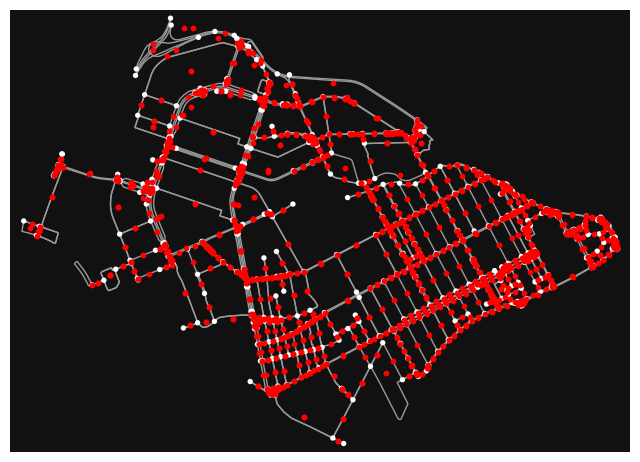

In [36]:
fig, ax = ox.plot_graph(G, close=False, show=False)
for i in range(len(c)):
    ax.scatter(c.LAT_sensor[i], c.LON_sensor[i], c='red', s=10)
plt.show()

In [37]:
edges_vo_with_sensor = edges_vo
edges_vo_with_sensor['id_sens'] = id_sens
edges_vo_with_sensor['LAT_sensor'] = p1
edges_vo_with_sensor['LON_sensor'] = p2

In [38]:
edges_vo_with_sensor

osmid  oneway   lanes  \
u           v           key                                           
223631      763448262   0                 192137871    True       2   
763448262   3639158309  0                  60981084    True     NaN   
            1833317419  0    [763743931, 285257335]    True  [2, 3]   
3639158309  3639158308  0                 183951414    True       2   
            763448264   0                 359152338    True       1   
...                                             ...     ...     ...   
10212601282 10212601289 0                1116605703    True       2   
10212601283 10212601282 0                1116605701   False     NaN   
            10212601273 0                1116605704    True       2   
10212601289 10212601290 0                 605081846   False     NaN   
            10212601301 0                1116605703    True       2   

                                              name        highway  maxspeed  \
u           v           key                                                   
223631      763448262   0      набережная Макарова      secondary  RU:urban   
763448262   3639158309  0    Средний проспект В.О.    residential  RU:urban   
            1833317419  0      набережная Макарова      secondary  RU:urban   
3639158309  3639158308  0      набережная Макарова      secondary  RU:urban   
            763448264   0    Средний проспект В.О.    residential  RU:urban   
...                                            ...            ...       ...   
10212601282 10212601289 0     Железноводская улица       tertiary  RU:urban   
10212601283 10212601282 0                      NaN  tertiary_link       NaN   
            10212601273 0     Железноводская улица       tertiary  RU:urban   
10212601289 10212601290 0                      NaN  tertiary_link       NaN   
            10212601301 0     Железноводская улица       tertiary  RU:urban   

                            reversed   length                weight  \
u           v           key                                           
223631      763448262   0      False   21.732  0.052156799999999996   
763448262   3639158309  0      False    6.964             0.0167136   
            1833317419  0      False  242.279    0.5814695999999999   
3639158309  3639158308  0      False   22.209             0.0533016   
            763448264   0      False  125.523             0.3012552   
...                              ...      ...                   ...   
10212601282 10212601289 0      False   33.392             0.0801408   
10212601283 10212601282 0      False    5.980              0.014352   
            10212601273 0      False  104.325               0.25038   
10212601289 10212601290 0       True    5.897             0.0141528   
            10212601301 0      False  231.992             0.5567808   

                            transport_type  \
u           v           key                  
223631      763448262   0            drive   
763448262   3639158309  0            drive   
            1833317419  0            drive   
3639158309  3639158308  0            drive   
            763448264   0            drive   
...                                    ...   
10212601282 10212601289 0            drive   
10212601283 10212601282 0            drive   
            10212601273 0            drive   
10212601289 10212601290 0            drive   
            10212601301 0            drive   

                                                                      geometry  \
u           v           key                                                      
223631      763448262   0    LINESTRING (348611.657 6648539.634, 348592.303...   
763448262   3639158309  0    LINESTRING (348592.303 6648549.669, 348588.653...   
            1833317419  0    LINESTRING (348592.303 6648549.669, 348490.251...   
3639158309  3639158308  0    LINESTRING (348588.653 6648543.720, 348608.410...   
            763448264   0    LINESTRING (348588.653 6648543.720, 348582.420... 

In [39]:
str1 = edges_vo_with_sensor['osmid'].iloc[:2]
id_from = pd.Series(edges_vo_with_sensor.index.get_level_values(0))
id_to = pd.Series(edges_vo_with_sensor.index.get_level_values(1))
new_node = pd.DataFrame()
new_node['id_from'] = id_from
new_node['id_to'] = id_to
new_node['id_sens_1'] =  id_sens
new_node['length_id_sens_1'] =  (edges_vo['length'].values)/2
new_node['lat'] = edges_vo_with_sensor['LAT_sensor'].values
new_node['lon'] = edges_vo_with_sensor['LON_sensor'].values
new_node['name'] = edges_vo_with_sensor['name'].values
new_node

,id_from,id_to,id_sens_1,length_id_sens_1,lat,lon,name
0,223631,763448262,0,10.8660,348601.979801,6.648545e+06,набережная Макарова
1,763448262,3639158309,1,3.4820,348590.477531,6.648547e+06,Средний проспект В.О.
2,763448262,1833317419,2,121.1395,348486.916016,6.648610e+06,набережная Макарова
3,3639158309,3639158308,3,11.1045,348598.531440,6.648539e+06,набережная Макарова
4,3639158309,763448264,4,62.7615,348533.946596,6.648513e+06,Средний проспект В.О.
...,...,...,...,...,...,...,...
1416,10212601282,10212601289,1416,16.6960,346604.021022,6.649303e+06,Железноводская улица
1417,10212601283,10212601282,1417,2.9900,346620.807404,6.649300e+06,NaN
1418,10212601283,10212601273,1418,52.1625,346673.180923,6.649298e+06,Железноводская улица
1419,10212601289,10212601290,1419,2.9485,346587.244841,6.649299e+06,NaN


In [40]:
from shapely import Point, LineString

In [41]:
s = []
for i in range(len(new_node)):
 s.append(Point(new_node['lat'].iloc[i], new_node['lon'].iloc[i]))
new_node['g'] = s
new_node

,id_from,id_to,id_sens_1,length_id_sens_1,lat,lon,name,g
0,223631,763448262,0,10.8660,348601.979801,6.648545e+06,набережная Макарова,POINT (348601.9798010348 6648544.65153332)
1,763448262,3639158309,1,3.4820,348590.477531,6.648547e+06,Средний проспект В.О.,POINT (348590.4775305673 6648546.694894849)
2,763448262,1833317419,2,121.1395,348486.916016,6.648610e+06,набережная Макарова,POINT (348486.91601563426 6648609.720348453)
3,3639158309,3639158308,3,11.1045,348598.531440,6.648539e+06,набережная Макарова,POINT (348598.5314396181 6648538.571606759)
4,3639158309,763448264,4,62.7615,348533.946596,6.648513e+06,Средний проспект В.О.,POINT (348533.94659565407 6648512.822129229)
...,...,...,...,...,...,...,...,...
1416,10212601282,10212601289,1416,16.6960,346604.021022,6.649303e+06,Железноводская улица,POINT (346604.02102205524 6649302.588334301)
1417,10212601283,10212601282,1417,2.9900,346620.807404,6.649300e+06,NaN,POINT (346620.8074042548 6649299.928907109)
1418,10212601283,10212601273,1418,52.1625,346673.180923,6.649298e+06,Железноводская улица,POINT (346673.18092321156 6649297.838510301)
1419,10212601289,10212601290,1419,2.9485,346587.244841,6.649299e+06,NaN,POINT (346587.24484078283 6649299.299076615)


In [42]:
n2 = pd.DataFrame()
for i in range(len(new_node)):
    n2 = n2.append(new_node[new_node['id_from'] == new_node['id_to'].iloc[i]], ignore_index = True)
n2 = n2.rename(columns={'id_from' : 'id_to', 'id_to' : 'end_point', 'length_id_sens_1' : 'length_id_sens_2', 'id_sens_1' : 'id_sens_2', 'g' : 'g2'})
n2 = n2[['id_to', 'end_point', 'id_sens_2', 'length_id_sens_2', 'g2']].drop_duplicates()
n2

C:\Users\belko\AppData\Local\Temp\ipykernel_11056\2127498941.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  n2 = n2.append(new_node[new_node['id_from'] == new_node['id_to'].iloc[i]], ignore_index = True)


,id_to,end_point,id_sens_2,length_id_sens_2,g2
0,763448262,3639158309,1,3.4820,POINT (348590.4775305673 6648546.694894849)
1,763448262,1833317419,2,121.1395,POINT (348486.91601563426 6648609.720348453)
2,3639158309,3639158308,3,11.1045,POINT (348598.5314396181 6648538.571606759)
3,3639158309,763448264,4,62.7615,POINT (348533.94659565407 6648512.822129229)
4,1833317419,1395097282,5,41.8275,POINT (348345.73025904974 6648691.654982362)
...,...,...,...,...,...
3124,10212601263,10212601303,1406,40.3680,POINT (347109.00163538626 6649305.439254159)
3125,10212601262,10212601265,1401,3.5565,POINT (347041.2531773499 6649307.80349626)
3126,10212601262,10212601263,1402,13.5695,POINT (347054.88311296975 6649304.474066947)
3127,10212601268,10212601270,1407,3.4880,POINT (346988.3104177306 6649306.807514411)


In [43]:
result = new_node.merge(n2, on='id_to')
result = result[['id_from','id_to','end_point','id_sens_1', 'id_sens_2', 'length_id_sens_1', 'length_id_sens_2', 'g', 'g2']].drop_duplicates()
result['length'] = result['length_id_sens_1'] + result['length_id_sens_2']
lines = []
for i in range(len(result)):
    lines.append(LineString([result.g.iloc[i], result.g2.iloc[i]]))
result['geometry'] = lines
result

,id_from,id_to,end_point,id_sens_1,id_sens_2,length_id_sens_1,length_id_sens_2,g,g2,length,geometry
0,223631,763448262,3639158309,0,1,10.8660,3.4820,POINT (348601.9798010348 6648544.65153332),POINT (348590.4775305673 6648546.694894849),14.3480,LINESTRING (348601.9798010348 6648544.65153332...
1,223631,763448262,1833317419,0,2,10.8660,121.1395,POINT (348601.9798010348 6648544.65153332),POINT (348486.91601563426 6648609.720348453),132.0055,LINESTRING (348601.9798010348 6648544.65153332...
2,763448262,3639158309,3639158308,1,3,3.4820,11.1045,POINT (348590.4775305673 6648546.694894849),POINT (348598.5314396181 6648538.571606759),14.5865,LINESTRING (348590.4775305673 6648546.69489484...
3,763448262,3639158309,763448264,1,4,3.4820,62.7615,POINT (348590.4775305673 6648546.694894849),POINT (348533.94659565407 6648512.822129229),66.2435,LINESTRING (348590.4775305673 6648546.69489484...
4,1943928021,3639158309,3639158308,275,3,88.9485,11.1045,POINT (348509.5765114379 6648585.064991184),POINT (348598.5314396181 6648538.571606759),100.0530,LINESTRING (348509.5765114379 6648585.06499118...
...,...,...,...,...,...,...,...,...,...,...,...
3158,10212601270,10212601262,10212601263,1412,1402,26.3115,13.5695,POINT (347014.8678004097 6649303.778720386),POINT (347054.88311296975 6649304.474066947),39.8810,LINESTRING (347014.8678004097 6649303.77872038...
3159,10212601265,10212601268,10212601270,1404,1407,26.4550,3.4880,POINT (347014.69579467084 6649310.832290284),POINT (346988.3104177306 6649306.807514411),29.9430,LINESTRING (347014.69579467084 6649310.8322902...
3160,10212601265,10212601268,10212601266,1404,1408,26.4550,2.3820,POINT (347014.69579467084 6649310.832290284),POINT (346985.7630731396 6649310.246722374),28.8370,LINESTRING (347014.69579467084 6649310.8322902...
3161,10212601270,10212601268,10212601270,1411,1407,3.4880,3.4880,POINT (346988.3104177306 6649306.807514411),POINT (346988.3104177306 6649306.807514411),6.9760,LINESTRING (346988.3104177306 6649306.80751441...


In [44]:
VO_sens_edges = result[['id_sens_1', 'id_sens_2', 'length', 'geometry']]
VO_sens_edges_for_ox = VO_sens_edges.rename(columns={'id_sens_1' : 'u', 'id_sens_2' : 'v', 'length': 'distance'})
VO_sens_edges_for_ox['k'] = 0
#VO_sens_edges = gpd.GeoDataFrame(VO_sens_edges, crs="EPSG:32636", geometry=VO_sens_edges.geometry)
VO_sens_edges_for_ox.set_index(['u','v','k'], inplace=True)
VO_sens_edges_for_ox = gpd.GeoDataFrame(VO_sens_edges_for_ox, crs="EPSG:32636", geometry=VO_sens_edges_for_ox.geometry)
VO_sens_edges_for_ox

distance                                           geometry
u    v    k                                                             
0    1    0   14.3480  LINESTRING (348601.980 6648544.652, 348590.478...
     2    0  132.0055  LINESTRING (348601.980 6648544.652, 348486.916...
1    3    0   14.5865  LINESTRING (348590.478 6648546.695, 348598.531...
     4    0   66.2435  LINESTRING (348590.478 6648546.695, 348533.947...
275  3    0  100.0530  LINESTRING (348509.577 6648585.065, 348598.531...
...               ...                                                ...
1412 1402 0   39.8810  LINESTRING (347014.868 6649303.779, 347054.883...
1404 1407 0   29.9430  LINESTRING (347014.696 6649310.832, 346988.310...
     1408 0   28.8370  LINESTRING (347014.696 6649310.832, 346985.763...
1411 1407 0    6.9760  LINESTRING (346988.310 6649306.808, 346988.310...
     1408 0    5.8700  LINESTRING (346988.310 6649306.808, 346985.763...

[3163 rows x 2 columns]

In [45]:
VO_sens_edges

,id_sens_1,id_sens_2,length,geometry
0,0,1,14.3480,LINESTRING (348601.9798010348 6648544.65153332...
1,0,2,132.0055,LINESTRING (348601.9798010348 6648544.65153332...
2,1,3,14.5865,LINESTRING (348590.4775305673 6648546.69489484...
3,1,4,66.2435,LINESTRING (348590.4775305673 6648546.69489484...
4,275,3,100.0530,LINESTRING (348509.5765114379 6648585.06499118...
...,...,...,...,...
3158,1412,1402,39.8810,LINESTRING (347014.8678004097 6649303.77872038...
3159,1404,1407,29.9430,LINESTRING (347014.69579467084 6649310.8322902...
3160,1404,1408,28.8370,LINESTRING (347014.69579467084 6649310.8322902...
3161,1411,1407,6.9760,LINESTRING (346988.3104177306 6649306.80751441...


In [46]:
id_sens = edges_vo_with_sensor['id_sens'].values
max_speed = edges_vo_with_sensor['maxspeed'].values
VO_sens_nodes = pd.DataFrame(columns=['id_sens', 'x', 'y', 'max_speed', 'name', 'geometry', 'speed', 'date'])
VO_sens_nodes['id_sens'] = id_sens
VO_sens_nodes['max_speed'] = max_speed
VO_sens_nodes['geometry'] = new_node['g']
VO_sens_nodes['name'] = new_node['name']
VO_sens_nodes['x'] = new_node['lat']
VO_sens_nodes['y'] = new_node['lon']
geometry = [Point(xy) for xy in zip(VO_sens_nodes.x, VO_sens_nodes.y)]
VO_sens_nodes = gpd.GeoDataFrame(VO_sens_nodes, crs="EPSG:32636", geometry=geometry)
VO_sens_nodes

,id_sens,x,y,max_speed,name,geometry,speed,date
0,0,348601.979801,6.648545e+06,RU:urban,набережная Макарова,POINT (348601.980 6648544.652),NaN,NaN
1,1,348590.477531,6.648547e+06,RU:urban,Средний проспект В.О.,POINT (348590.478 6648546.695),NaN,NaN
2,2,348486.916016,6.648610e+06,RU:urban,набережная Макарова,POINT (348486.916 6648609.720),NaN,NaN
3,3,348598.531440,6.648539e+06,RU:urban,набережная Макарова,POINT (348598.531 6648538.572),NaN,NaN
4,4,348533.946596,6.648513e+06,RU:urban,Средний проспект В.О.,POINT (348533.947 6648512.822),NaN,NaN
...,...,...,...,...,...,...,...,...
1416,1416,346604.021022,6.649303e+06,RU:urban,Железноводская улица,POINT (346604.021 6649302.588),NaN,NaN
1417,1417,346620.807404,6.649300e+06,NaN,NaN,POINT (346620.807 6649299.929),NaN,NaN
1418,1418,346673.180923,6.649298e+06,RU:urban,Железноводская улица,POINT (346673.181 6649297.839),NaN,NaN
1419,1419,346587.244841,6.649299e+06,NaN,NaN,POINT (346587.245 6649299.299),NaN,NaN


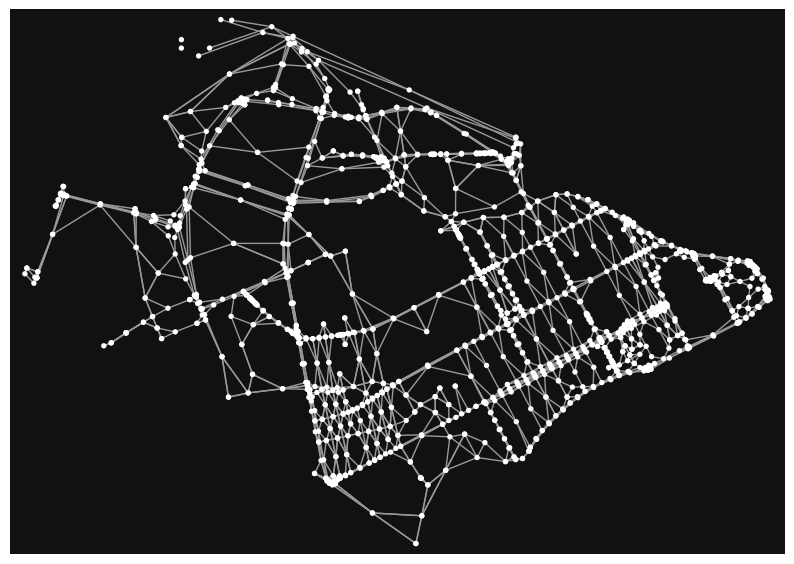

In [47]:
#Конечный граф Васильевского острова, где вершинами явялются сенсоры на середине дороги, а ребрами достижимость между сенсорами
T = ox.graph_from_gdfs(VO_sens_nodes, VO_sens_edges_for_ox)
ox.save_graphml(T,"vo_sens_graph.graphml")
fig, ax = ox.plot_graph(T, figsize=(10,10), close=False, show=False)

In [48]:
# Для моделирования исторических данных использовались данные следующие данные
# https://probki-spb.ru/ где истроические данные по пробкам СПБ (шкала в %) 
# https://upd.su/probki/spb/zoom-month - динамика пробок (шкала баллов)
# https://yandex.ru/maps/2/saint-petersburg/probki/ - яндекс пробки для анализа загруженных участков дорог

# План моделирования 
# 1. Выгрузить данные динамики пробок с https://upd.su/probki/spb/zoom-month 
# 2. Определить по яндекс пробкам участки дорог с максимальной нагрузкой 
# 3. Сгенерировать среднюю скорость на дорогах используя формулу V = Vm*(1-K), где K - уровень загрузки участка дороги, Vm - максимальная допустимая скорость на участке дороги

In [49]:
VO_sens_nodes

,id_sens,x,y,max_speed,name,geometry,speed,date
0,0,348601.979801,6.648545e+06,RU:urban,набережная Макарова,POINT (348601.980 6648544.652),NaN,NaN
1,1,348590.477531,6.648547e+06,RU:urban,Средний проспект В.О.,POINT (348590.478 6648546.695),NaN,NaN
2,2,348486.916016,6.648610e+06,RU:urban,набережная Макарова,POINT (348486.916 6648609.720),NaN,NaN
3,3,348598.531440,6.648539e+06,RU:urban,набережная Макарова,POINT (348598.531 6648538.572),NaN,NaN
4,4,348533.946596,6.648513e+06,RU:urban,Средний проспект В.О.,POINT (348533.947 6648512.822),NaN,NaN
...,...,...,...,...,...,...,...,...
1416,1416,346604.021022,6.649303e+06,RU:urban,Железноводская улица,POINT (346604.021 6649302.588),NaN,NaN
1417,1417,346620.807404,6.649300e+06,NaN,NaN,POINT (346620.807 6649299.929),NaN,NaN
1418,1418,346673.180923,6.649298e+06,RU:urban,Железноводская улица,POINT (346673.181 6649297.839),NaN,NaN
1419,1419,346587.244841,6.649299e+06,NaN,NaN,POINT (346587.245 6649299.299),NaN,NaN


In [50]:
VO_sens_nodes['max_speed'].explode().unique()

array(['RU:urban', nan, '40', 'RU:living_street', '20', 'RU:rural', '90',
       '70', '60'], dtype=object)

In [51]:
import math
VO_sens_nodes.loc[VO_sens_nodes['max_speed'] == 'RU:urban', 'max_speed'] = 60
VO_sens_nodes.loc[VO_sens_nodes['max_speed'] == 'RU:living_street', 'max_speed'] = 20
VO_sens_nodes.loc[VO_sens_nodes['max_speed'] == 'RU:rural', 'max_speed'] = 90
VO_sens_nodes.loc[VO_sens_nodes['max_speed'] == float('nan'), 'max_speed'] = 60
for i in range(len(VO_sens_nodes)):
    if type(VO_sens_nodes['max_speed'].iloc[i]) == list:
        VO_sens_nodes['max_speed'].iloc[i] = 60
    elif math.isnan(float(VO_sens_nodes['max_speed'].iloc[i])) == True:
        VO_sens_nodes['max_speed'].iloc[i] = 60
VO_sens_nodes

C:\Users\belko\AppData\Local\Temp\ipykernel_11056\4280601686.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VO_sens_nodes['max_speed'].iloc[i] = 60
C:\Users\belko\AppData\Local\Temp\ipykernel_11056\4280601686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VO_sens_nodes['max_speed'].iloc[i] = 60


,id_sens,x,y,max_speed,name,geometry,speed,date
0,0,348601.979801,6.648545e+06,60,набережная Макарова,POINT (348601.980 6648544.652),NaN,NaN
1,1,348590.477531,6.648547e+06,60,Средний проспект В.О.,POINT (348590.478 6648546.695),NaN,NaN
2,2,348486.916016,6.648610e+06,60,набережная Макарова,POINT (348486.916 6648609.720),NaN,NaN
3,3,348598.531440,6.648539e+06,60,набережная Макарова,POINT (348598.531 6648538.572),NaN,NaN
4,4,348533.946596,6.648513e+06,60,Средний проспект В.О.,POINT (348533.947 6648512.822),NaN,NaN
...,...,...,...,...,...,...,...,...
1416,1416,346604.021022,6.649303e+06,60,Железноводская улица,POINT (346604.021 6649302.588),NaN,NaN
1417,1417,346620.807404,6.649300e+06,60,NaN,POINT (346620.807 6649299.929),NaN,NaN
1418,1418,346673.180923,6.649298e+06,60,Железноводская улица,POINT (346673.181 6649297.839),NaN,NaN
1419,1419,346587.244841,6.649299e+06,60,NaN,POINT (346587.245 6649299.299),NaN,NaN


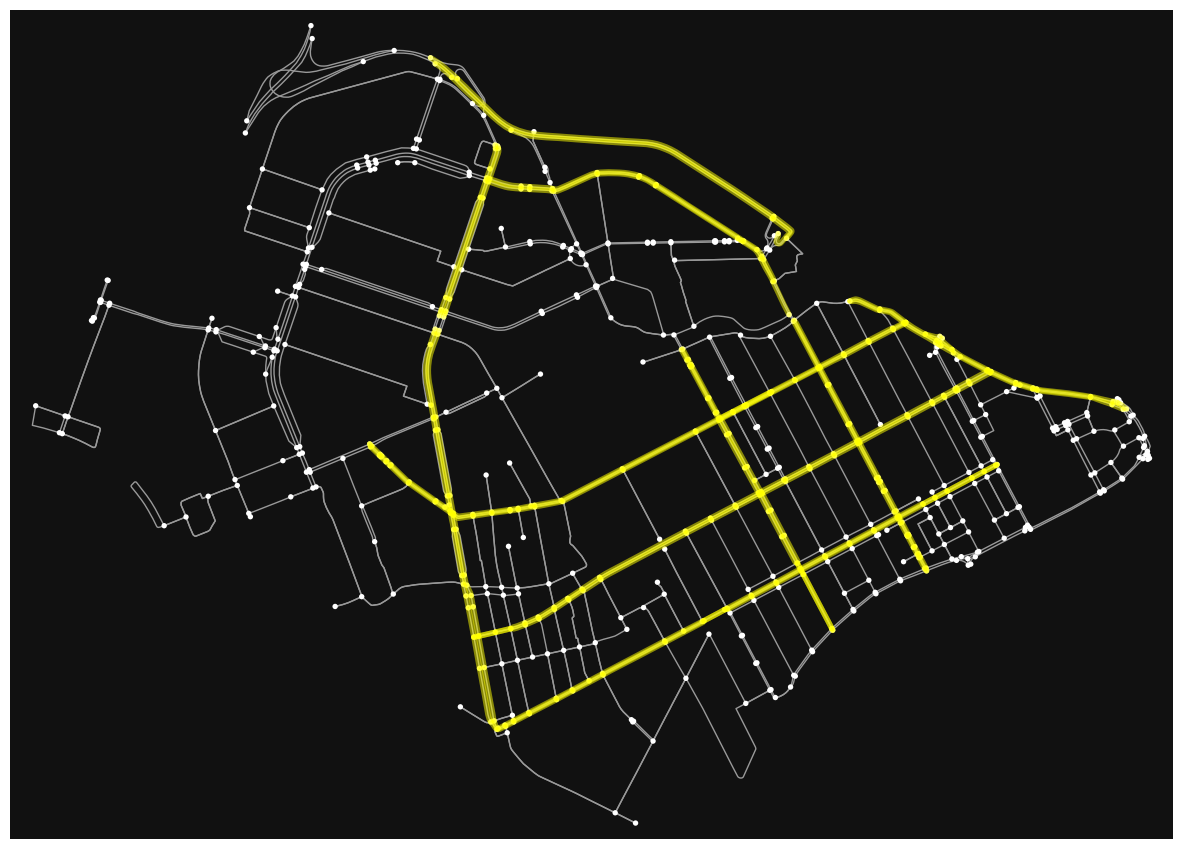

In [52]:
G = ox.load_graphml("C:/Рабочий стол/Dataset_Traffic/drive.graphml")
street_mas = ['8-я линия В.О.', '9-я линия В.О.', 'Средний проспект В.О.', 'Малый проспект В.О.', 'Большой проспект В.О.', 'набережная Макарова', '16-17-я линии В.О.', '16-я линия В.О.', '17-я линия В.О.', 'Уральская улица', '24-я линия В.О.', 'Наличная улица']
street = []
for i in range(len(street_mas)):
    for j in range(len(edges_vo_with_sensor.loc[edges_vo_with_sensor.name == street_mas[i]])):
        street.append(list(edges_vo_with_sensor.loc[edges_vo_with_sensor.name == street_mas[i]].iloc[j].name[:2]))
type(street)
fig, ax = ox.plot_graph_routes(G, street, show=False, close=False, route_colors='yellow', route_linewidth=1, orig_dest_size=1, figsize=(15,15))

In [53]:
traf = pd.read_excel('Трафик.XLSX')

In [54]:
monday_traf = traf.loc[traf['DAY']=='ПН'].mean().values
tuesday_traf = traf.loc[traf['DAY']=='ВТ'].mean().values
wednesday_traf = traf.loc[traf['DAY']=='СР'].mean().values
thursday_traf = traf.loc[traf['DAY']=='ЧТ'].mean().values
friday_traf = traf.loc[traf['DAY']=='ПТ'].mean().values
saturday_traf = traf.loc[traf['DAY']=='СБ'].mean().values
sunday_traf = traf.loc[traf['DAY']=='ВС'].mean().values
day = 0
t = 1
traf.iloc[day][t:t+24]

C:\Users\belko\AppData\Local\Temp\ipykernel_11056\2863782390.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  monday_traf = traf.loc[traf['DAY']=='ПН'].mean().values
C:\Users\belko\AppData\Local\Temp\ipykernel_11056\2863782390.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  monday_traf = traf.loc[traf['DAY']=='ПН'].mean().values
C:\Users\belko\AppData\Local\Temp\ipykernel_11056\2863782390.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  tuesday_traf = traf.loc[traf['DAY']=='ВТ'].mean().values
C:\Users\belko\AppData\Local\Temp\ipykernel_11056\2863782390

00:00:00     0
01:00:00     0
02:00:00     0
03:00:00     0
04:00:00     0
05:00:00     0
06:00:00     1
07:00:00     3
08:00:00    24
09:00:00    38
10:00:00    27
11:00:00    29
12:00:00    31
13:00:00    35
14:00:00    40
15:00:00    45
16:00:00    50
17:00:00    55
18:00:00    70
19:00:00    55
20:00:00    31
21:00:00    23
22:00:00    13
23:00:00     4
Name: 0, dtype: object

C:\Users\belko\AppData\Local\Temp\ipykernel_11056\3622921343.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  monday_traf['k'] = traf.loc[traf['DAY']=='ПН'].mean().values
C:\Users\belko\AppData\Local\Temp\ipykernel_11056\3622921343.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  monday_traf['k'] = traf.loc[traf['DAY']=='ПН'].mean().values


27.136363636363637 25.822022761668617


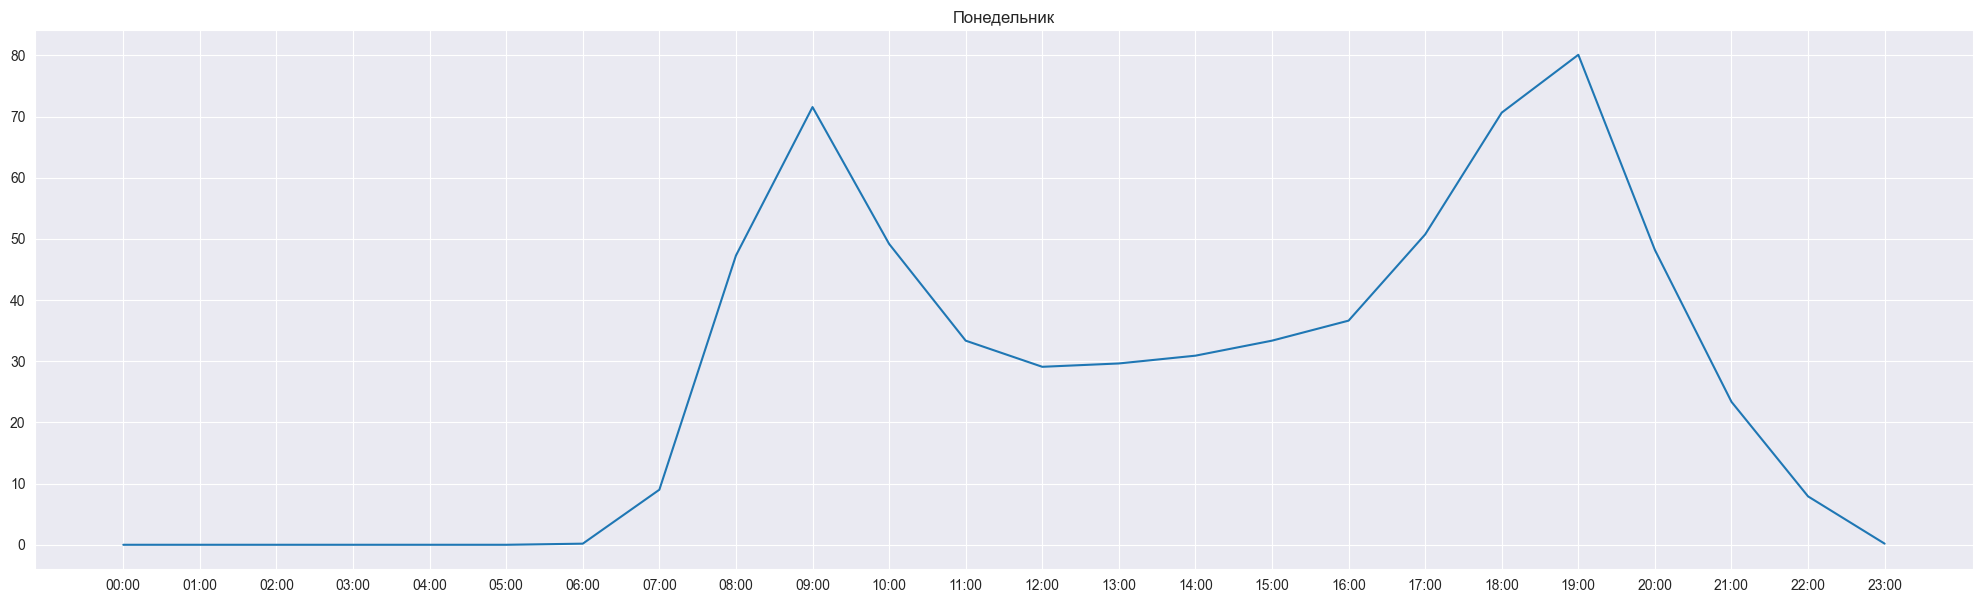

In [55]:
monday_traf = pd.DataFrame(columns = ['time', 'k'])
monday_traf['time'] = time_list[:24]
monday_traf['k'] = traf.loc[traf['DAY']=='ПН'].mean().values
monday_traf = monday_traf.set_index('time')
plt.figure(figsize=(25, 7))
plt.title('Понедельник')
plt.plot(monday_traf)
print(monday_traf['k'].mean(), monday_traf['k'].std())

C:\Users\belko\AppData\Local\Temp\ipykernel_11056\206608862.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sunday_traf['k'] = traf.loc[traf['DAY']=='ВС'].mean().values
C:\Users\belko\AppData\Local\Temp\ipykernel_11056\206608862.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sunday_traf['k'] = traf.loc[traf['DAY']=='ВС'].mean().values


8.511363636363637

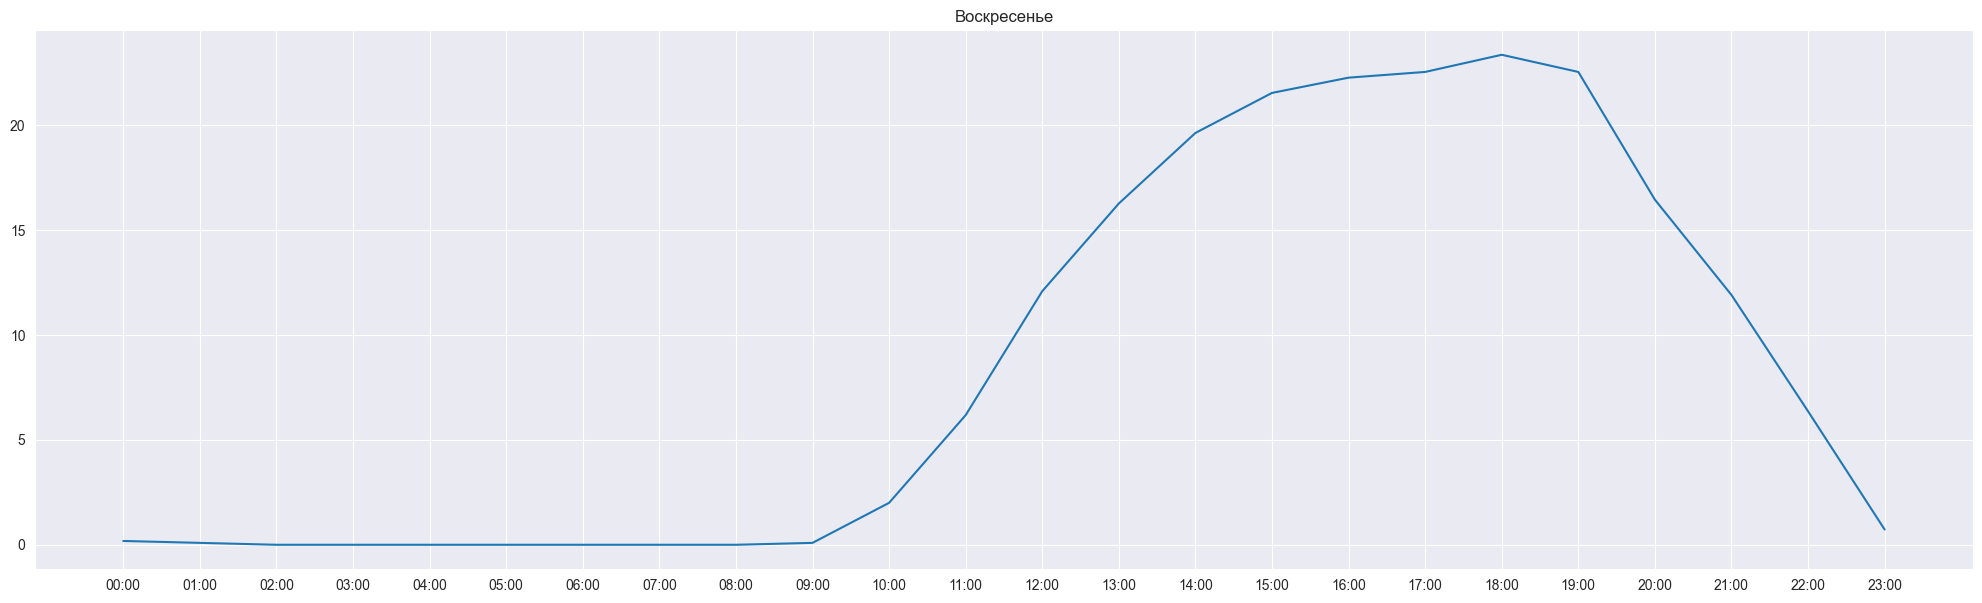

In [61]:
sunday_traf = pd.DataFrame(columns = ['time', 'k'])
sunday_traf['time'] = time_list[:24]
sunday_traf['k'] = traf.loc[traf['DAY']=='ВС'].mean().values
sunday_traf = sunday_traf.set_index('time')
plt.figure(figsize=(25, 7))
plt.title('Воскресенье')
plt.plot(sunday_traf)
sunday_traf['k'].mean()

In [62]:
VO_sens_nodes

,id_sens,x,y,max_speed,name,geometry,speed,date
0,0,348601.979801,6.648545e+06,60,набережная Макарова,POINT (348601.980 6648544.652),NaN,NaN
1,1,348590.477531,6.648547e+06,60,Средний проспект В.О.,POINT (348590.478 6648546.695),NaN,NaN
2,2,348486.916016,6.648610e+06,60,набережная Макарова,POINT (348486.916 6648609.720),NaN,NaN
3,3,348598.531440,6.648539e+06,60,набережная Макарова,POINT (348598.531 6648538.572),NaN,NaN
4,4,348533.946596,6.648513e+06,60,Средний проспект В.О.,POINT (348533.947 6648512.822),NaN,NaN
...,...,...,...,...,...,...,...,...
1416,1416,346604.021022,6.649303e+06,60,Железноводская улица,POINT (346604.021 6649302.588),NaN,NaN
1417,1417,346620.807404,6.649300e+06,60,NaN,POINT (346620.807 6649299.929),NaN,NaN
1418,1418,346673.180923,6.649298e+06,60,Железноводская улица,POINT (346673.181 6649297.839),NaN,NaN
1419,1419,346587.244841,6.649299e+06,60,NaN,POINT (346587.245 6649299.299),NaN,NaN


In [65]:
import random
from datetime import datetime, timedelta

traf = pd.read_excel('Трафик.XLSX')
#traf = pd.read_excel('Трафик_рабочие_часы.XLSX')
d = 0
t = 1
traf.iloc[d][t:t+24]

# Define the start time 
#start_time = datetime(2023, 9, 1, 9, 0)  # Replace with the desired date
start_time = datetime(2023, 9, 1, 0, 0)  

# Define the end time 
end_time = datetime(2023, 11, 14, 23, 59)  # Replace with the desired date
# Define the time interval 
time_interval = timedelta(minutes=60)
# Initialize an empty list to store the times
time_list = []
date_list = []
day = []
# Generate the list of times with half-hour intervals
current_time = start_time

while current_time <= end_time:
    time_list.append(current_time.strftime('%H:%M'))
    date_list.append(current_time.strftime('%d-%m-%Y'))
    day.append(current_time.strftime('%a'))
    current_time += time_interval
    
'''work_hours = 0 # с 9:00 до 23:00 (15 часов)
while current_time <= end_time:
    time_list.append(current_time.strftime('%H:%M'))
    date_list.append(current_time.strftime('%d-%m-%Y'))
    day.append(current_time.strftime('%a'))
    work_hours += 1
    if work_hours == 15:
        current_time += 10*time_interval
        work_hours = 0
    else:
        current_time += time_interval'''


street_mas = ['8-я линия В.О.', '9-я линия В.О.', 'Средний проспект В.О.', 'Малый проспект В.О.', 'Большой проспект В.О.', 'набережная Макарова', '16-17-я линии В.О.', '16-я линия В.О.', '17-я линия В.О.', 'Уральская улица', '24-я линия В.О.', 'Наличная улица']

# Display the list of times
step_of_day = 0
pd_for_2month = [None] * len(time_list)
for i in range(len(time_list)):
    speeds = []
    for j in range(len(VO_sens_nodes)):
        #kw = traf.iloc[i//15][(i% 15)+1]
        kw = traf.iloc[i//24][(i% 24)+1]
        if kw <= 3:
            kw += random.randint(0, 100)/100
        elif kw <= 10:
            kw = random.randint(kw*100 - 100, kw*100 + 100)/100
        elif kw <= 30:
            kw = random.randint(kw*100 - 150, kw*100 + 150)/100
        elif kw <= 80:
            kw = random.randint(kw*100 - 200, kw*100 + 200)/100
        else:
            kw = random.randint(kw*100 - 200, kw*100 - 50)/100
        if not (VO_sens_nodes['name'].iloc[j] in street_mas):
            if kw >= 90:
                kw -= random.randint(1500, 2000)/100
            elif kw >= 80:
                kw -= random.randint(1200, 1600)/100
            elif kw >= 70:
                kw -= random.randint(1000, 1300)/100
            elif kw >= 60:
                kw -= random.randint(800, 1100)/100
            elif kw >= 50:
                kw -= random.randint(600, 900)/100
            elif kw >= 40:
                kw -= random.randint(400, 700)/100
            elif kw >= 30:
                kw -= random.randint(200, 500)/100
            elif kw >= 20:
                kw -= random.randint(200, 300)/100
            elif kw >= 10:
                kw -= random.randint(100, 200)/100
        else:
            if kw >= 90:
                kw += random.randint(0, 100)/100
            elif kw >= 50:
                kw += random.randint(500, 700)/100
            elif kw >= 40:
                kw += random.randint(400, 600)/100
            elif kw >= 30:
                kw += random.randint(300, 500)/100
            elif kw >= 20:
                kw += random.randint(200, 400)/100
            elif kw >= 10:
                kw += random.randint(100, 200)/100
        if kw > 100:
                print(kw)
        s = (100-kw)/100
        speeds.append((float(VO_sens_nodes['max_speed'].iloc[j])*0.85) * s)
    pd_for_2month[i] = speeds

In [41]:
#np.savez('traffic_9_10_11_month_work_hours', pd_for_2month, time_list, date_list, day)
np.savez('traffic_9_10_11', pd_for_2month, time_list, date_list, day)

In [43]:
# 75 дней 1421 датчик 15 часов (или 24)
len(pd_for_2month)*len(pd_for_2month[0])
len(pd_for_2month)

1800

37.5706375

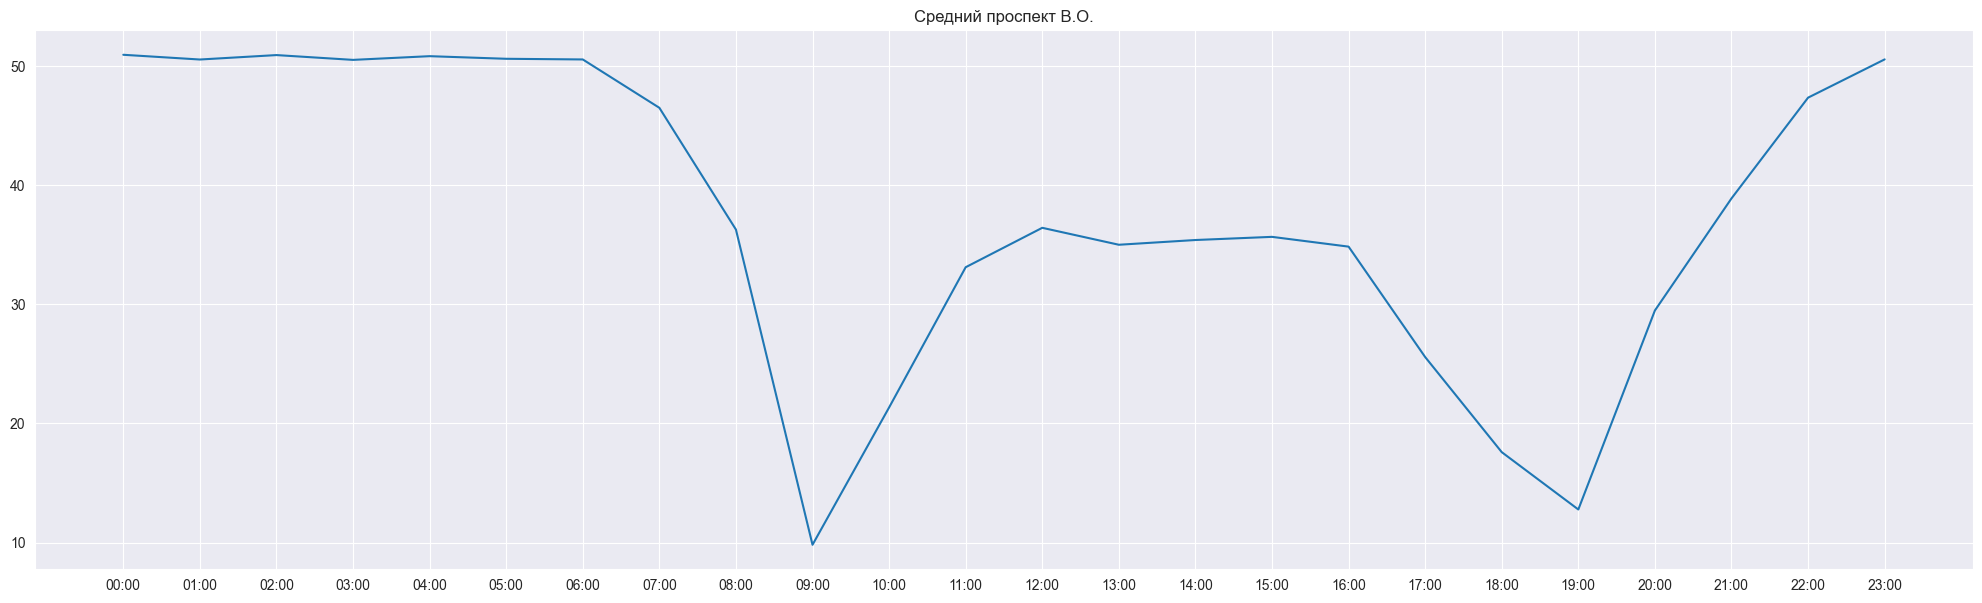

In [74]:
pd_new = pd.DataFrame(columns=['date','speed'])
c = []
for i in range(24):
    c.append(pd_for_2month[24*3+i][5])
pd_new['speed'] = c
pd_new['date'] = time_list[0:24]
pd_new = pd_new.set_index('date')
plt.figure(figsize=(25, 7))
plt.plot(pd_new)
plt.title('Средний проспект В.О.')
pd_new['speed'].mean()

37.5706375

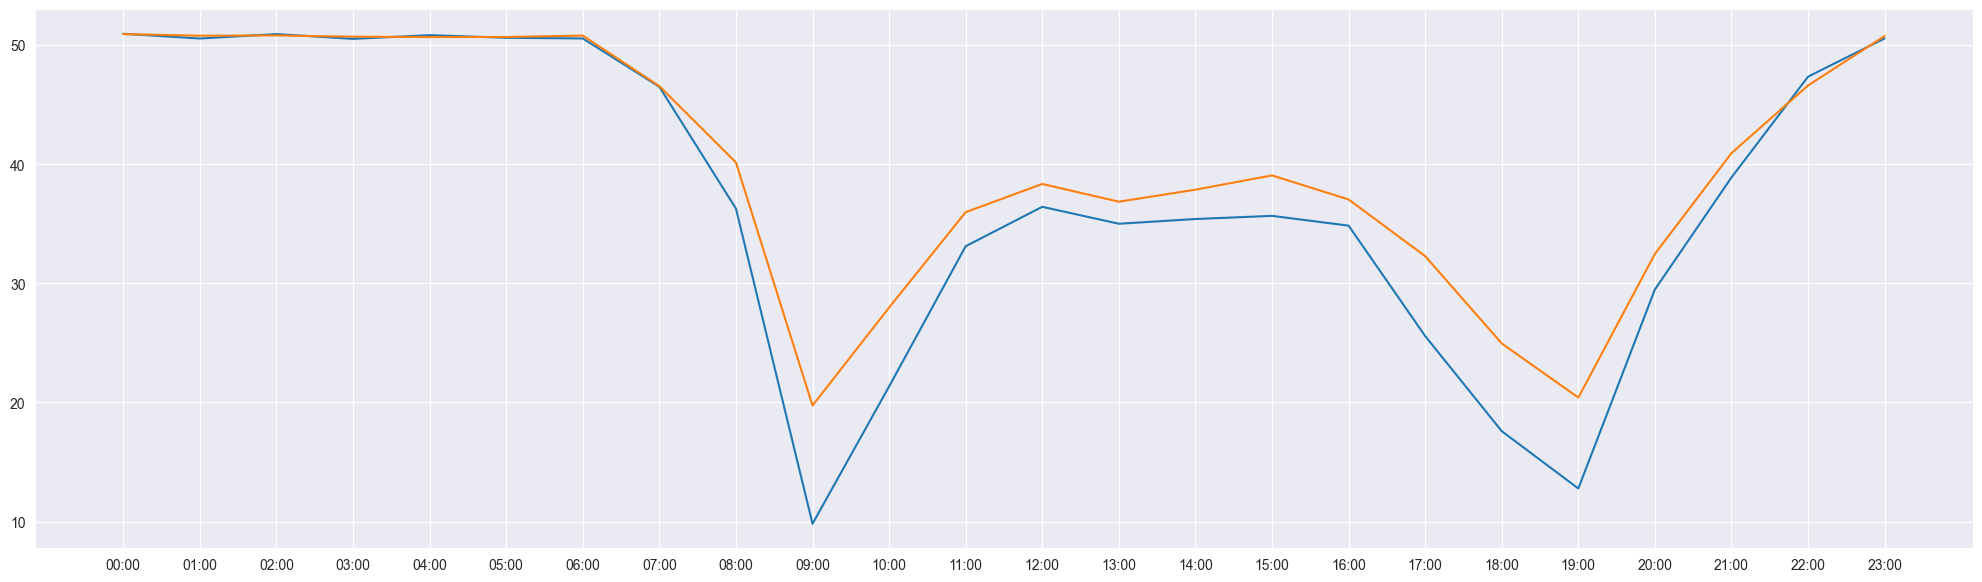

In [77]:
pd_new1 = pd.DataFrame(columns=['date', 'speed'])
c = []
for i in range(24):
    c.append(pd_for_2month[24*3+i][96])
pd_new1['speed'] = c
pd_new1['date'] = time_list[:24]
pd_new1 = pd_new1.set_index('date')
plt.figure(figsize=(25, 7))
#plt.title('Гаванская улица')
plt.plot(pd_new)
plt.plot(pd_new1)
pd_new['speed'].mean()

30.676499999999994

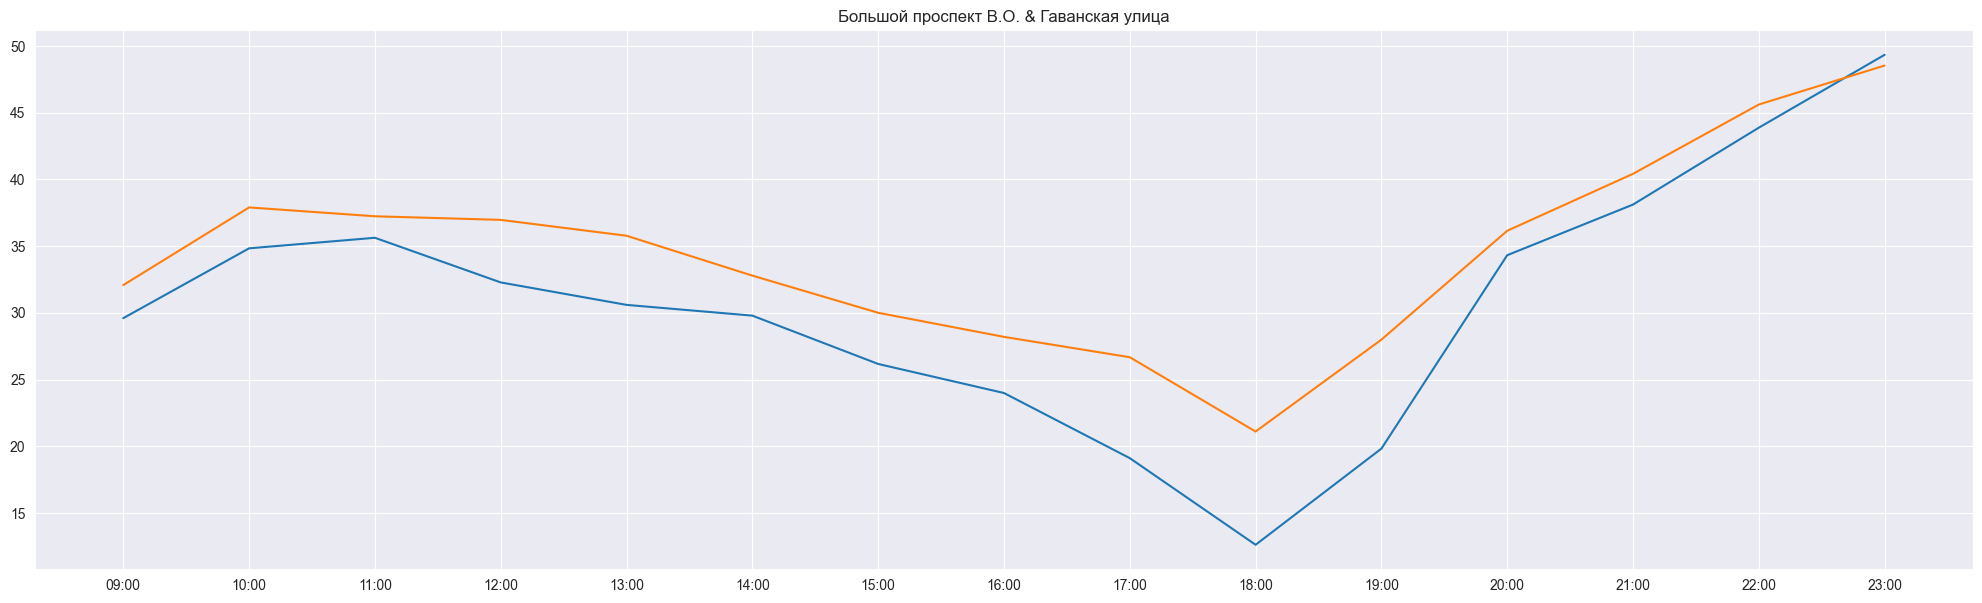

In [64]:
len(pd_for_2month[0])
pd_new = pd.DataFrame(columns=['date', 'speed'])
c = []
for i in range(15):
    c.append(pd_for_2month[i][83])
pd_new['speed'] = c
pd_new['date'] = time_list[:15]
pd_new = pd_new.set_index('date')
plt.figure(figsize=(25, 7))
plt.title('Большой проспект В.О. & Гаванская улица')
plt.plot(pd_new)
plt.plot(pd_new1)
pd_new['speed'].mean()

34.648125

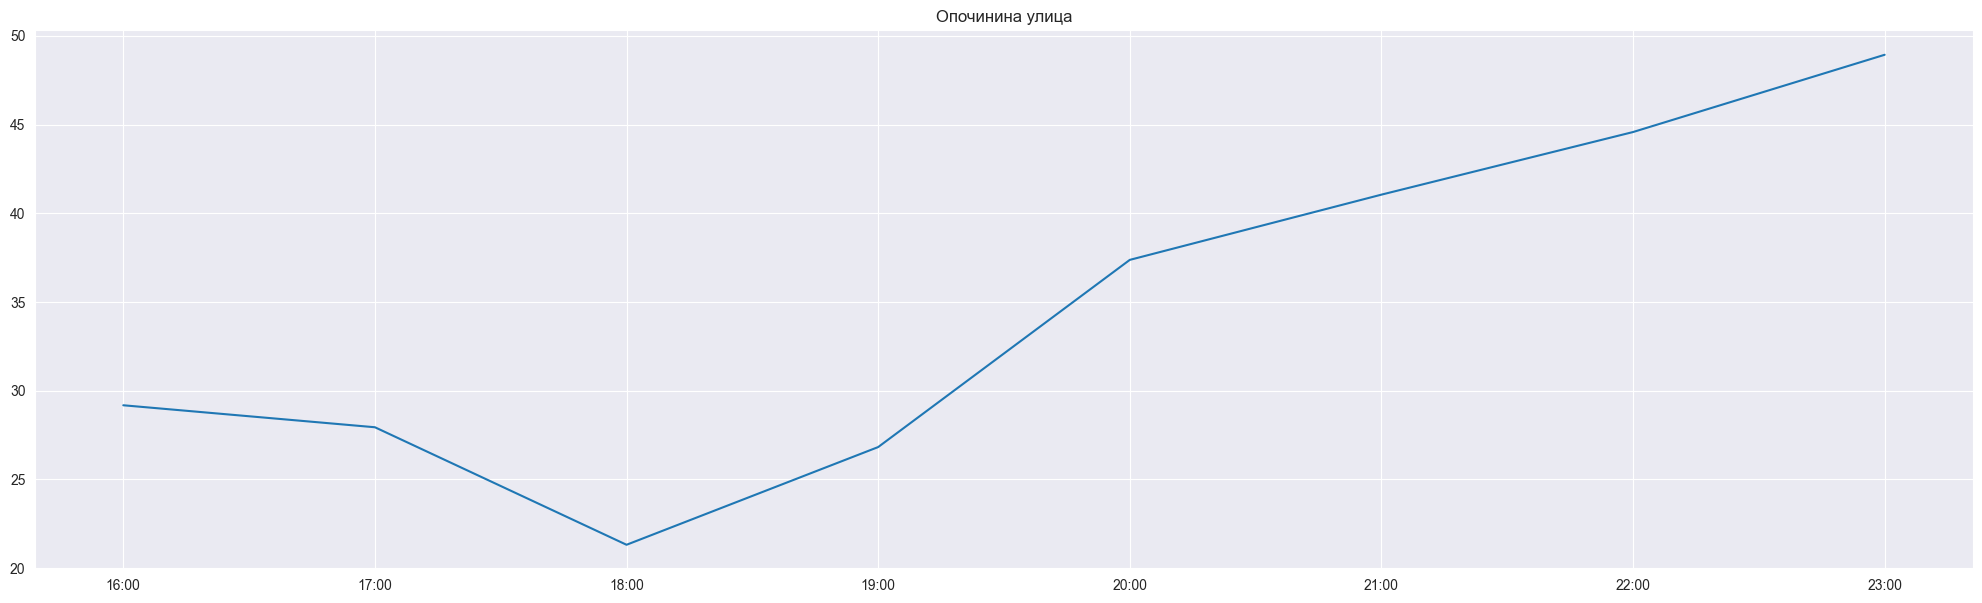

In [65]:
len(pd_for_2month[0])
pd_new = pd.DataFrame(columns=['date', 'speed'])
c = []
for i in range(15-7):
    c.append(pd_for_2month[i+7][79])
pd_new['speed'] = c
pd_new['date'] = time_list[7:15]
pd_new = pd_new.set_index('date')
plt.figure(figsize=(25, 7))
plt.title('Опочинина улица')
plt.plot(pd_new)
pd_new['speed'].mean()

35.67

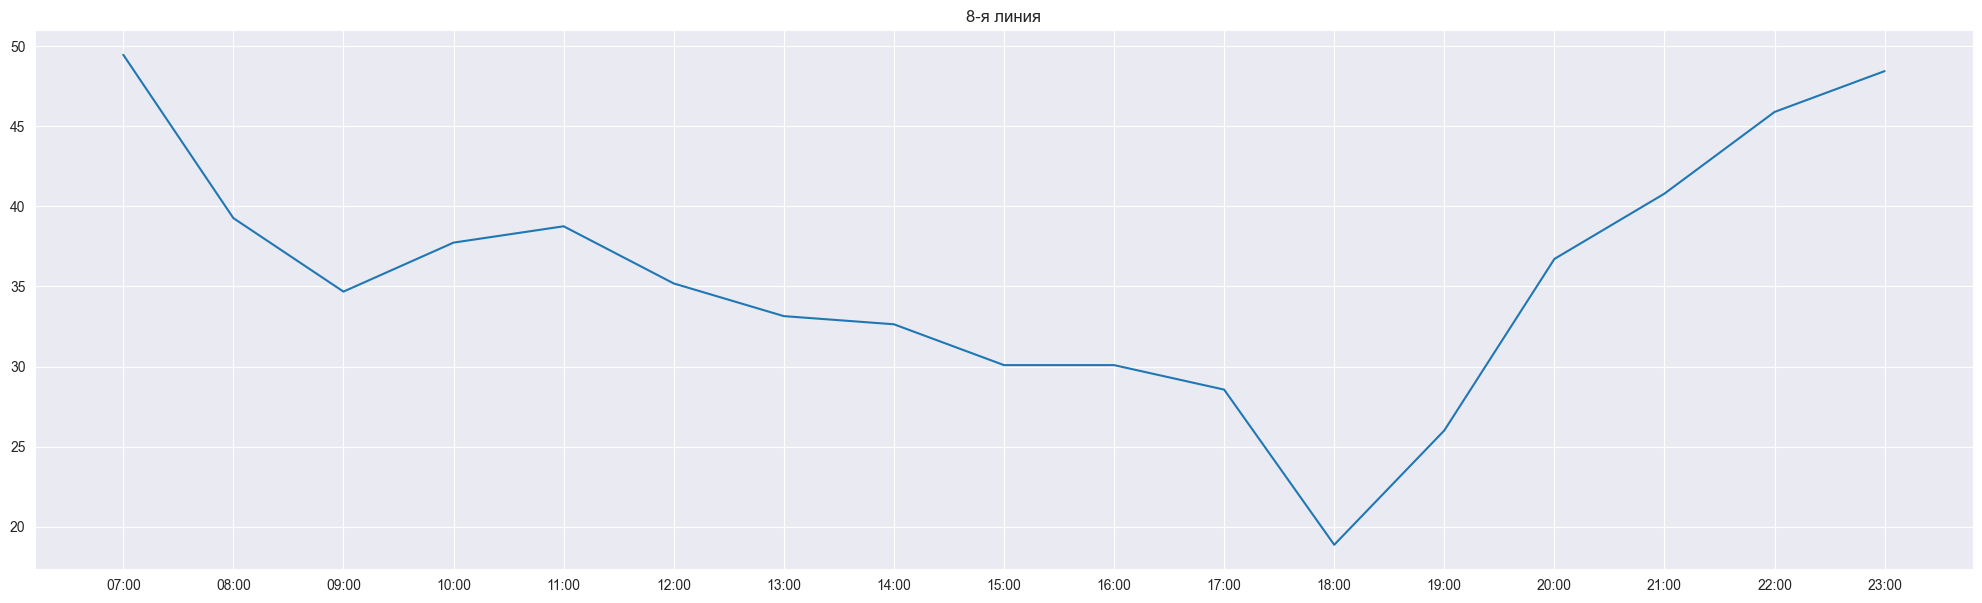

In [55]:
len(pd_for_2month[0])
pd_new = pd.DataFrame(columns=['date', 'speed'])
c = []
for i in range(24-7):
    c.append(pd_for_2month[i+7][200])
pd_new['speed'] = c
pd_new['date'] = time_list[7:24]
pd_new = pd_new.set_index('date')
plt.figure(figsize=(25, 7))
plt.title('8-я линия')
plt.plot(pd_new)
pd_new['speed'].mean()

31.020000000000003

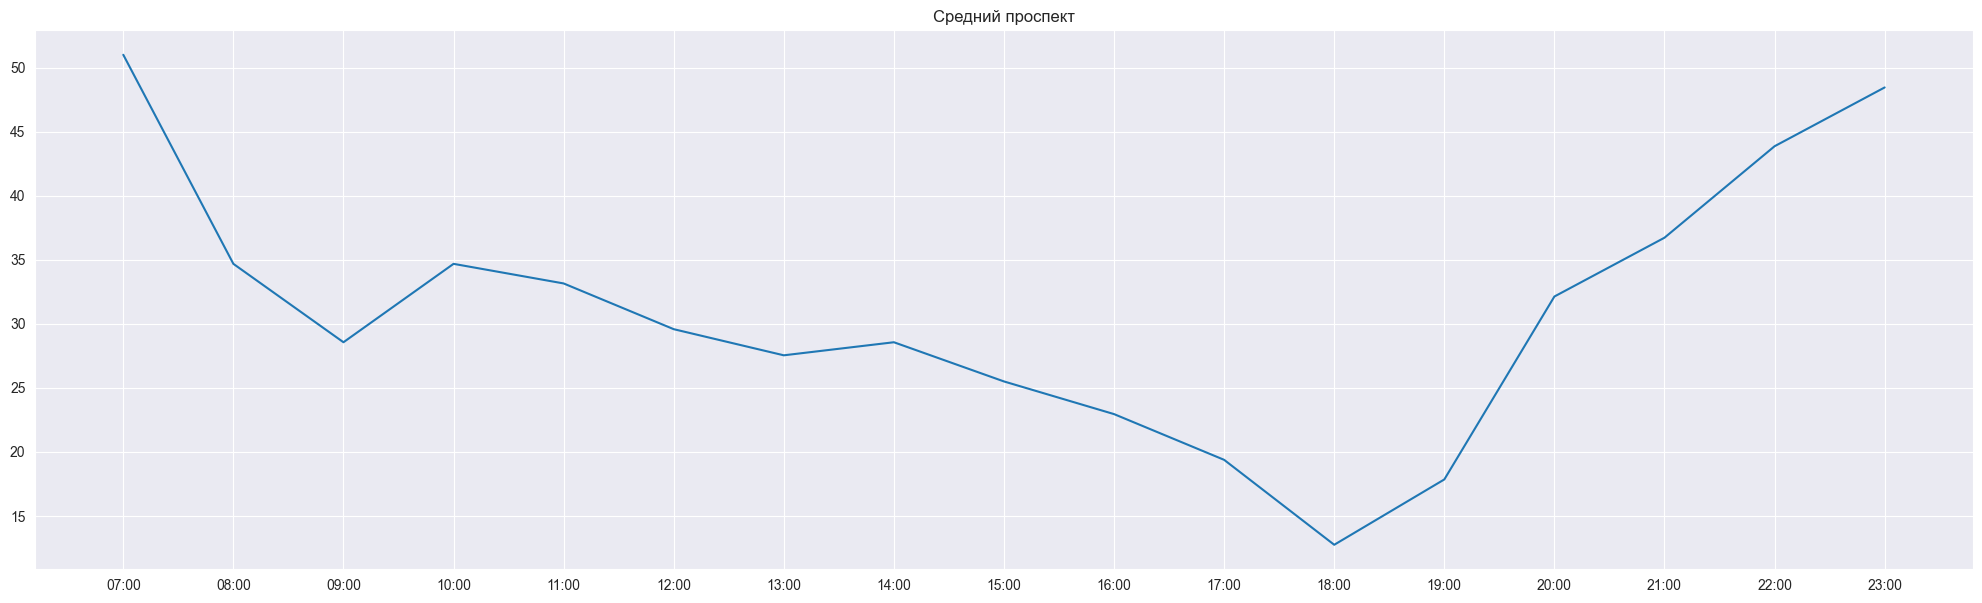

In [56]:
len(pd_for_2month[0])
pd_new = pd.DataFrame(columns=['date', 'speed'])
c = []
for i in range(24-7):
    c.append(pd_for_2month[i+7][1])
pd_new['speed'] = c
pd_new['date'] = time_list[7:24]
pd_new = pd_new.set_index('date')
plt.figure(figsize=(25, 7))
plt.title('Средний проспект')
plt.plot(pd_new)
pd_new['speed'].mean()

In [66]:
len(time_list)

1125

In [67]:
len(pd_for_2month)

1125

In [68]:
len(date_list)

1125

In [69]:
len(day)

1125

In [90]:
#np.savez('traffic_9_10_11_month_work_hours', pd_for_2month, time_list, date_list, day)
np.savez('traffic_9_10_11', pd_for_2month, time_list, date_list, day)

In [42]:
from numpy import load
data = load('traffic_9_10_11_month.npz')
#data = load('traffic_9_10_11_month_work_hours.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

arr_0
[[49.98 51.   50.49 ... 50.49 49.47 50.49]
 [49.47 49.47 49.98 ... 51.   51.   49.98]
 [49.98 50.49 51.   ... 51.   49.47 49.47]
 ...
 [33.15 34.68 33.15 ... 38.25 39.78 39.27]
 [45.39 46.41 46.41 ... 46.41 46.41 46.92]
 [51.   49.98 50.49 ... 50.49 49.47 51.  ]]
arr_1
['00:00' '01:00' '02:00' ... '21:00' '22:00' '23:00']
arr_2
['01-09-2023' '01-09-2023' '01-09-2023' ... '14-11-2023' '14-11-2023'
 '14-11-2023']
arr_3
['Fri' 'Fri' 'Fri' ... 'Tue' 'Tue' 'Tue']


In [92]:
speeds = data['arr_0']
time = data['arr_1']
date = data['arr_2']
weekday = data['arr_3']

In [93]:
speeds[0]

array([29.7126, 29.6463, 28.9731, ..., 33.4305, 33.2724, 32.64  ])

In [94]:
for i in range(len(speeds)):
    for j in range(len(speeds[0])):
        if speeds[i][j]<0:
            print(i)
            print(j)

In [64]:
VO_sens_nodes
edges_vo

osmid  oneway   lanes  \
u           v           key                                           
223631      763448262   0                 192137871    True       2   
763448262   3639158309  0                  60981084    True     NaN   
            1833317419  0    [763743931, 285257335]    True  [2, 3]   
3639158309  3639158308  0                 183951414    True       2   
            763448264   0                 359152338    True       1   
...                                             ...     ...     ...   
10212601282 10212601289 0                1116605703    True       2   
10212601283 10212601282 0                1116605701   False     NaN   
            10212601273 0                1116605704    True       2   
10212601289 10212601290 0                 605081846   False     NaN   
            10212601301 0                1116605703    True       2   

                                              name        highway  maxspeed  \
u           v           key                                                   
223631      763448262   0      набережная Макарова      secondary  RU:urban   
763448262   3639158309  0    Средний проспект В.О.    residential  RU:urban   
            1833317419  0      набережная Макарова      secondary  RU:urban   
3639158309  3639158308  0      набережная Макарова      secondary  RU:urban   
            763448264   0    Средний проспект В.О.    residential  RU:urban   
...                                            ...            ...       ...   
10212601282 10212601289 0     Железноводская улица       tertiary  RU:urban   
10212601283 10212601282 0                      NaN  tertiary_link       NaN   
            10212601273 0     Железноводская улица       tertiary  RU:urban   
10212601289 10212601290 0                      NaN  tertiary_link       NaN   
            10212601301 0     Железноводская улица       tertiary  RU:urban   

                            reversed   length                weight  \
u           v           key                                           
223631      763448262   0      False   21.732  0.052156799999999996   
763448262   3639158309  0      False    6.964             0.0167136   
            1833317419  0      False  242.279    0.5814695999999999   
3639158309  3639158308  0      False   22.209             0.0533016   
            763448264   0      False  125.523             0.3012552   
...                              ...      ...                   ...   
10212601282 10212601289 0      False   33.392             0.0801408   
10212601283 10212601282 0      False    5.980              0.014352   
            10212601273 0      False  104.325               0.25038   
10212601289 10212601290 0       True    5.897             0.0141528   
            10212601301 0      False  231.992             0.5567808   

                            transport_type  \
u           v           key                  
223631      763448262   0            drive   
763448262   3639158309  0            drive   
            1833317419  0            drive   
3639158309  3639158308  0            drive   
            763448264   0            drive   
...                                    ...   
10212601282 10212601289 0            drive   
10212601283 10212601282 0            drive   
            10212601273 0            drive   
10212601289 10212601290 0            drive   
            10212601301 0            drive   

                                                                      geometry  \
u           v           key                                                      
223631      763448262   0    LINESTRING (348611.657 6648539.634, 348592.303...   
763448262   3639158309  0    LINESTRING (348592.303 6648549.669, 348588.653...   
            1833317419  0    LINESTRING (348592.303 6648549.669, 348490.251...   
3639158309  3639158308  0    LINESTRING (348588.653 6648543.720, 348608.410...   
            763448264   0    LINESTRING (348588.653 6648543.720, 348582.420... 

In [66]:
T1 = ox.load_graphml("graph_sens_1.graphml")
node, edges = ox.graph_to_gdfs(T1)
edges_vo_1 = edges_vo
edges_vo_1['speed'] = speeds[i]
for i in range(len(edges_vo_1)):
    edges_vo_1['weight'].iloc[i] = edges_vo_1['length'].iloc[i]/(edges_vo_1['speed'].iloc[i]*(1000/60))
V = ox.graph_from_gdfs(node_vo, edges_vo_1)
ox.save_graphml(V, 'drive_1.graphml')
V1 = ox.load_graphml("drive_1.graphml")
#fig, ax = ox.plot_graph(V1, figsize=(10,10), close=False, show=False)
edges_vo_1

C:\Users\belko\AppData\Local\Temp\ipykernel_3724\1236838099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_vo_1['weight'].iloc[i] = edges_vo_1['length'].iloc[i]/(edges_vo_1['speed'].iloc[i]*(1000/60))


osmid  oneway   lanes  \
u           v           key                                           
223631      763448262   0                 192137871    True       2   
763448262   3639158309  0                  60981084    True     NaN   
            1833317419  0    [763743931, 285257335]    True  [2, 3]   
3639158309  3639158308  0                 183951414    True       2   
            763448264   0                 359152338    True       1   
...                                             ...     ...     ...   
10212601282 10212601289 0                1116605703    True       2   
10212601283 10212601282 0                1116605701   False     NaN   
            10212601273 0                1116605704    True       2   
10212601289 10212601290 0                 605081846   False     NaN   
            10212601301 0                1116605703    True       2   

                                              name        highway  maxspeed  \
u           v           key                                                   
223631      763448262   0      набережная Макарова      secondary  RU:urban   
763448262   3639158309  0    Средний проспект В.О.    residential  RU:urban   
            1833317419  0      набережная Макарова      secondary  RU:urban   
3639158309  3639158308  0      набережная Макарова      secondary  RU:urban   
            763448264   0    Средний проспект В.О.    residential  RU:urban   
...                                            ...            ...       ...   
10212601282 10212601289 0     Железноводская улица       tertiary  RU:urban   
10212601283 10212601282 0                      NaN  tertiary_link       NaN   
            10212601273 0     Железноводская улица       tertiary  RU:urban   
10212601289 10212601290 0                      NaN  tertiary_link       NaN   
            10212601301 0     Железноводская улица       tertiary  RU:urban   

                            reversed   length    weight transport_type  \
u           v           key                                              
223631      763448262   0      False   21.732  0.026358          drive   
763448262   3639158309  0      False    6.964  0.008193          drive   
            1833317419  0      False  242.279  0.285034          drive   
3639158309  3639158308  0      False   22.209  0.026128          drive   
            763448264   0      False  125.523  0.152241          drive   
...                              ...      ...       ...            ...   
10212601282 10212601289 0      False   33.392  0.039682          drive   
10212601283 10212601282 0      False    5.980  0.007179          drive   
            10212601273 0      False  104.325   0.12524          drive   
10212601289 10212601290 0       True    5.897  0.007008          drive   
            10212601301 0      False  231.992  0.272932          drive   

                                                                      geometry  \
u           v           key                                                      
223631      763448262   0    LINESTRING (348611.657 6648539.634, 348592.303...   
763448262   3639158309  0    LINESTRING (348592.303 6648549.669, 348588.653...   
            1833317419  0    LINESTRING (348592.303 6648549.669, 348490.251...   
3639158309  3639158308  0    LINESTRING (348588.653 6648543.720, 348608.410...   
            763448264   0    LINESTRING (348588.653 6648543.720, 348582.420...   
...                                                                        ...   
10212601282 10212601289 0    LINESTRING (346620.772 6649302.924, 346587.270...   
10212601283 10212601282 0    LINESTRING (346620.842 6649296.934, 346620.772...   
            10212601273 0    LINESTRING (346620.842 6649296.934, 346626.987...   
10212601289 10212601290 0    LINESTRING (346587.270 6649302.253, 346587.220...   
            10212601301 0    LINESTRING (346587.270 6649302.253, 346495.151...   

                            bridge tunnel width access  id_sens 

In [66]:
i = 18+48*3
t_d_w = str(time[i] + ' ' + date[i] + ' ' + weekday[i])
print(t_d_w)
VO_sens_nodes['speed'] = speeds[i]
VO_sens_nodes['date'] = t_d_w
VO_sens_nodes
VO_sens_edges_for_ox
T = ox.graph_from_gdfs(VO_sens_nodes, VO_sens_edges_for_ox)
ox.save_graphml(T, 'graph_sens_2.graphml')
T2 = ox.load_graphml("graph_sens_2.graphml")
node, edges = ox.graph_to_gdfs(T2)
node
edges_vo_2 = edges_vo
edges_vo_2['speed'] = speeds[i]
for i in range(len(edges_vo_2)):
    edges_vo_2['weight'].iloc[i] = edges_vo_2['length'].iloc[i]/(edges_vo_2['speed'].iloc[i]*(1000/60))
V = ox.graph_from_gdfs(node_vo, edges_vo_2)

Vnx = nx.from_pandas_edgelist(edges_vo_2, source='u', target='v',
                                     edge_attr=True,)
nx.write_graphml(Vnx, 'drive_2_nx.graphml')
ox.save_graphml(V, 'drive_2.graphml')
V2 = ox.load_graphml("drive_2.graphml")
#fig, ax = ox.plot_graph(V1, figsize=(10,10), close=False, show=False)
edges_vo_2

09:00 04-09-2023 Mon


C:\Users\belko\AppData\Local\Temp\ipykernel_8084\439423244.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_vo_2['weight'].iloc[i] = edges_vo_2['length'].iloc[i]/(edges_vo_2['speed'].iloc[i]*(1000/60))


KeyError: 'u'

In [174]:
i = 18+48*1
t_d_w = str(time[i] + ' ' + date[i] + ' ' + weekday[i])
print(t_d_w)
VO_sens_nodes['speed'] = speeds[i]
VO_sens_nodes['date'] = t_d_w
VO_sens_nodes
VO_sens_edges_for_ox
T = ox.graph_from_gdfs(VO_sens_nodes, VO_sens_edges_for_ox)
ox.save_graphml(T, 'graph_sens_7.graphml')
T7 = ox.load_graphml("graph_sens_7.graphml")
node, edges = ox.graph_to_gdfs(T7)
node
edges_vo_7 = edges_vo
edges_vo_7['speed'] = speeds[i]
edges_vo_7['time_min'] = 0
for i in range(len(edges_vo_7)):
    edges_vo_7['time_min'].iloc[i] = float(edges_vo_7['length'].iloc[i]/(edges_vo_7['speed'].iloc[i]*(1000/60)))
edges_vo_7.astype({'weight': 'float64'})
print(edges_vo_7.dtypes)    
V = ox.graph_from_gdfs(node_vo, edges_vo_7)
ox.save_graphml(V, 'drive_7.graphml')
#nx.write_graphml(V, 'drive_7_1.graphml')
n, e = ox.graph_to_gdfs(V)
e[('time_min')].iloc[0]

09:00 02-09-2023 Sat


C:\Users\belko\AppData\Local\Temp\ipykernel_8908\2875572776.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_vo_7['time_min'].iloc[i] = float(edges_vo_7['length'].iloc[i]/(edges_vo_7['speed'].iloc[i]*(1000/60)))


osmid               object
oneway                bool
lanes               object
name                object
highway             object
maxspeed            object
reversed            object
length             float64
weight              object
transport_type      object
geometry          geometry
bridge              object
tunnel              object
width               object
access              object
id_sens              int64
LAT_sensor         float64
LON_sensor         float64
speed              float64
time_min           float64
dtype: object


5.255880919180582e-07

In [544]:
edges_vo

osmid  oneway   lanes  \
u           v           key                                           
223631      763448262   0                 192137871    True       2   
763448262   3639158309  0                  60981084    True     NaN   
            1833317419  0    [763743931, 285257335]    True  [2, 3]   
3639158309  3639158308  0                 183951414    True       2   
            763448264   0                 359152338    True       1   
...                                             ...     ...     ...   
10212601282 10212601289 0                1116605703    True       2   
10212601283 10212601282 0                1116605701   False     NaN   
            10212601273 0                1116605704    True       2   
10212601289 10212601290 0                 605081846   False     NaN   
            10212601301 0                1116605703    True       2   

                                              name        highway  maxspeed  \
u           v           key                                                   
223631      763448262   0      набережная Макарова      secondary  RU:urban   
763448262   3639158309  0    Средний проспект В.О.    residential  RU:urban   
            1833317419  0      набережная Макарова      secondary  RU:urban   
3639158309  3639158308  0      набережная Макарова      secondary  RU:urban   
            763448264   0    Средний проспект В.О.    residential  RU:urban   
...                                            ...            ...       ...   
10212601282 10212601289 0     Железноводская улица       tertiary  RU:urban   
10212601283 10212601282 0                      NaN  tertiary_link       NaN   
            10212601273 0     Железноводская улица       tertiary  RU:urban   
10212601289 10212601290 0                      NaN  tertiary_link       NaN   
            10212601301 0     Железноводская улица       tertiary  RU:urban   

                            reversed   length     weight transport_type  \
u           v           key                                               
223631      763448262   0      False   21.732   2.173200          drive   
763448262   3639158309  0      False    6.964   0.535692          drive   
            1833317419  0      False  242.279  17.305643          drive   
3639158309  3639158308  0      False   22.209   1.480600          drive   
            763448264   0      False  125.523   9.298000          drive   
...                              ...      ...        ...            ...   
10212601282 10212601289 0      False   33.392   1.908114          drive   
10212601283 10212601282 0      False    5.980   0.412414          drive   
            10212601273 0      False  104.325   6.136765          drive   
10212601289 10212601290 0       True    5.897   0.368563          drive   
            10212601301 0      False  231.992  14.967226          drive   

                                                                      geometry  \
u           v           key                                                      
223631      763448262   0    LINESTRING (348611.657 6648539.634, 348592.303...   
763448262   3639158309  0    LINESTRING (348592.303 6648549.669, 348588.653...   
            1833317419  0    LINESTRING (348592.303 6648549.669, 348490.251...   
3639158309  3639158308  0    LINESTRING (348588.653 6648543.720, 348608.410...   
            763448264   0    LINESTRING (348588.653 6648543.720, 348582.420...   
...                                                                        ...   
10212601282 10212601289 0    LINESTRING (346620.772 6649302.924, 346587.270...   
10212601283 10212601282 0    LINESTRING (346620.842 6649296.934, 346620.772...   
            10212601273 0    LINESTRING (346620.842 6649296.934, 346626.987...   
10212601289 10212601290 0    LINESTRING (346587.270 6649302.253, 346587.220...   
            10212601301 0    LINESTRING (346587.270 6649302.253, 346495.151...   

                            bridge tunnel width acc

In [330]:
node_vo

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
223631,6.648540e+06,348611.657095,traffic_signals,3,30.289742,59.946379,POINT (348611.657 6648539.634)
763448262,6.648550e+06,348592.302507,traffic_signals,3,30.289389,59.946462,POINT (348592.303 6648549.669)
3639158309,6.648544e+06,348588.652554,traffic_signals,4,30.289328,59.946407,POINT (348588.653 6648543.720)
1833317419,6.648670e+06,348381.529524,NaN,3,30.285532,59.947462,POINT (348381.530 6648669.771)
223633,6.648443e+06,348859.015065,NaN,3,30.294235,59.945603,POINT (348859.015 6648442.978)
...,...,...,...,...,...,...,...
10212601270,6.649303e+06,346988.467791,NaN,3,30.260155,59.952629,POINT (346988.468 6649303.317)
10212601266,6.649310e+06,346983.373102,NaN,3,30.260059,59.952689,POINT (346983.373 6649310.195)
10212601282,6.649303e+06,346620.772395,NaN,3,30.253581,59.952489,POINT (346620.772 6649302.924)


In [350]:
VO_sens_nodes

,id_sens,x,y,max_speed,name,geometry,speed,date
0,0,348601.979801,6.648545e+06,60,набережная Макарова,POINT (348601.980 6648544.652),47.5,23:00 04-09-2023 Mon
1,1,348590.477531,6.648547e+06,60,Средний проспект В.О.,POINT (348590.478 6648546.695),45.0,23:00 04-09-2023 Mon
2,2,348486.916016,6.648610e+06,60,набережная Макарова,POINT (348486.916 6648609.720),46.5,23:00 04-09-2023 Mon
3,3,348598.531440,6.648539e+06,60,набережная Макарова,POINT (348598.531 6648538.572),46.0,23:00 04-09-2023 Mon
4,4,348533.946596,6.648513e+06,60,Средний проспект В.О.,POINT (348533.947 6648512.822),45.5,23:00 04-09-2023 Mon
...,...,...,...,...,...,...,...,...
1416,1416,346604.021022,6.649303e+06,60,Железноводская улица,POINT (346604.021 6649302.588),49.0,23:00 04-09-2023 Mon
1417,1417,346620.807404,6.649300e+06,60,NaN,POINT (346620.807 6649299.929),49.5,23:00 04-09-2023 Mon
1418,1418,346673.180923,6.649298e+06,60,Железноводская улица,POINT (346673.181 6649297.839),49.5,23:00 04-09-2023 Mon
1419,1419,346587.244841,6.649299e+06,60,NaN,POINT (346587.245 6649299.299),49.0,23:00 04-09-2023 Mon


In [378]:
distance_vo = VO_sens_edges[['id_sens_1', 'id_sens_2', 'length']]
distance_vo.to_csv('distance_sens_vo.csv', index=False)
distance_vo.loc[distance_vo['id_sens_1']==280]

,id_sens_1,id_sens_2,length
1020,280,283,5.3120
1021,280,284,207.6210
1022,280,285,85.1895


In [371]:
adj_vo = [[0]*1421 for i in range(1421)]
for i in range(len(distance_vo)):
    x = int(distance_vo['id_sens_1'][i])
    y = int(distance_vo['id_sens_2'][i])
    adj_vo[x][y] = distance_vo['length'][i]
for i in range(len(VO_sens_nodes)):
    adj_vo[i][i] = 1

In [380]:
adj_vo[283][280]

5.312

In [381]:
np.savez('adj_sens_vo', adj_vo)

In [382]:
data = load('adj_sens_vo.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

arr_0
[[  1.      14.348  132.0055 ...   0.       0.       0.    ]
 [  0.       1.       0.     ...   0.       0.       0.    ]
 [  0.       0.       1.     ...   0.       0.       0.    ]
 ...
 [  0.       0.       0.     ...   1.       0.       0.    ]
 [  0.       0.       0.     ...   0.       1.       0.    ]
 [  0.       0.       0.     ...   0.       0.       1.    ]]


In [3]:
import blocksnet as bn
import pyarrow.parquet as pq
import os

In [4]:
aggregated_blocks = gpd.read_parquet(os.path.join('blocks_cutter_result.parquet'))

In [6]:
from blocksnet.preprocessing import DataGetter, AggregateParameters
getter = DataGetter(blocks=aggregated_blocks)

In [170]:
transport_graph1 = ox.load_graphml('drive_2.graphml')
transport_graph2 = ox.load_graphml('drive_7.graphml')
n1, e1 = ox.graph_to_gdfs(transport_graph1)
n2, e2 = ox.graph_to_gdfs(transport_graph2)
e2['weight'] = e2['length']
e2['length'].iloc[0]
tg = ox.graph_from_gdfs(n2, e2)

In [163]:
result

,id_from,id_to,end_point,id_sens_1,id_sens_2,length_id_sens_1,length_id_sens_2,g,g2,length,geometry,weight,name
0,223631,763448262,3639158309,0,1,10.8660,3.4820,POINT (348601.9798010348 6648544.65153332),POINT (348590.4775305673 6648546.694894849),14.3480,LINESTRING (348601.9798010348 6648544.65153332...,5.203322e-06,набережная Макарова
1,223631,763448262,1833317419,0,2,10.8660,121.1395,POINT (348601.9798010348 6648544.65153332),POINT (348486.91601563426 6648609.720348453),132.0055,LINESTRING (348601.9798010348 6648544.65153332...,5.198809e-07,Средний проспект В.О.
2,763448262,3639158309,3639158308,1,3,3.4820,11.1045,POINT (348590.4775305673 6648546.694894849),POINT (348598.5314396181 6648538.571606759),14.5865,LINESTRING (348590.4775305673 6648546.69489484...,2.289106e-05,набережная Макарова
3,763448262,3639158309,763448264,1,4,3.4820,62.7615,POINT (348590.4775305673 6648546.694894849),POINT (348533.94659565407 6648512.822129229),66.2435,LINESTRING (348590.4775305673 6648546.69489484...,1.025930e-06,набережная Макарова
4,1943928021,3639158309,3639158308,275,3,88.9485,11.1045,POINT (348509.5765114379 6648585.064991184),POINT (348598.5314396181 6648538.571606759),100.0530,LINESTRING (348509.5765114379 6648585.06499118...,1.349370e-05,Средний проспект В.О.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,10212601270,10212601262,10212601263,1412,1402,26.3115,13.5695,POINT (347014.8678004097 6649303.778720386),POINT (347054.88311296975 6649304.474066947),39.8810,LINESTRING (347014.8678004097 6649303.77872038...,0.000000e+00,a
3159,10212601265,10212601268,10212601270,1404,1407,26.4550,3.4880,POINT (347014.69579467084 6649310.832290284),POINT (346988.3104177306 6649306.807514411),29.9430,LINESTRING (347014.69579467084 6649310.8322902...,0.000000e+00,a
3160,10212601265,10212601268,10212601266,1404,1408,26.4550,2.3820,POINT (347014.69579467084 6649310.832290284),POINT (346985.7630731396 6649310.246722374),28.8370,LINESTRING (347014.69579467084 6649310.8322902...,0.000000e+00,a
3161,10212601270,10212601268,10212601270,1411,1407,3.4880,3.4880,POINT (346988.3104177306 6649306.807514411),POINT (346988.3104177306 6649306.807514411),6.9760,LINESTRING (346988.3104177306 6649306.80751441...,0.000000e+00,a


In [177]:
import networkx as nx
result['time_min']=0
for i in range(len(edges_vo_2)):
    result['time_min'].iloc[i] = edges_vo_2['length'].iloc[i]/(edges_vo_2['speed'].iloc[i]*(1000/60))
Vnx = nx.from_pandas_edgelist(result, source='id_from', target='id_to',
                                     edge_attr='time_min' )
nx.write_graphml(Vnx, 'drive_2_nx.graphml')
T = nx.read_graphml('drive_2_nx.graphml')
e = nx.to_pandas_edgelist(T)
e

C:\Users\belko\AppData\Local\Temp\ipykernel_8908\1696437336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['time_min'].iloc[i] = edges_vo_2['length'].iloc[i]/(edges_vo_2['speed'].iloc[i]*(1000/60))


,source,target,time_min
0,223631,763448262,9.548833e-08
1,223631,6906567508,2.016743e-06
2,223631,3639158308,2.738519e-07
3,763448262,3639158309,2.432618e-07
4,763448262,1833317419,3.503641e-08
...,...,...,...
1093,5235032088,6484345458,0.000000e+00
1094,5235032089,5235032092,0.000000e+00
1095,9142382275,9156427846,0.000000e+00
1096,10209841123,10209841122,0.000000e+00


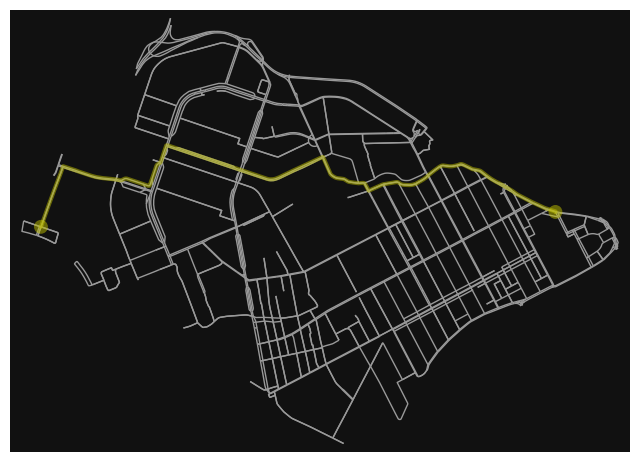

[3639158302,
 223633,
 6906567508,
 223631,
 763448262,
 1833317419,
 1395097282,
 1395097283,
 3639158335,
 3591891108,
 6254595631,
 178442690,
 1998404611,
 306563,
 4169083665,
 4169083664,
 1898956377,
 2520350035,
 327296,
 10209841014,
 252654101,
 306703,
 306698,
 3283815720,
 7701497035,
 1684973685,
 1684973678,
 1856000468,
 320110807,
 21633782,
 306807,
 2012020325,
 327240,
 319890,
 21633979,
 1511831190,
 1433662056,
 1433662127,
 1107611202,
 9225080376,
 8998714892,
 8418957443]

In [51]:
origin_coordinates = (348859.015, 6648442.978)
destination_coordinates = (343359.015, 6648142.978)

origin_edges = ox.nearest_edges(G, 348859.015, 6648442.978)
destination_edges = ox.nearest_edges(G, 343359.015, 6648142.97)


shortest_route_by_time1 = ox.shortest_path(transport_graph2, origin_edges[0], destination_edges[0], weight='length')

fig, ax = ox.plot_graph_route(G, shortest_route_by_time1, show=False, close=False, route_color='y', route_linewidth=3, node_size=0)


plt.show()
shortest_route_by_time1

C:\Users\belko\AppData\Local\Temp\ipykernel_3480\1711032603.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e1['travel_time'].iloc[i] = e1['length'].iloc[i]/(float(e1['speed'].iloc[i])*(1000/60))
C:\Users\belko\AppData\Local\Temp\ipykernel_3480\1711032603.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e2['travel_time'].iloc[i] = e2['length'].iloc[i]/(float(e2['speed'].iloc[i])*(1000/60))
C:\Users\belko\AppData\Local\Temp\ipykernel_3480\1711032603.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

Время в пути в первом случае: 31 минут
Время в пути во втором случае: 10 минут


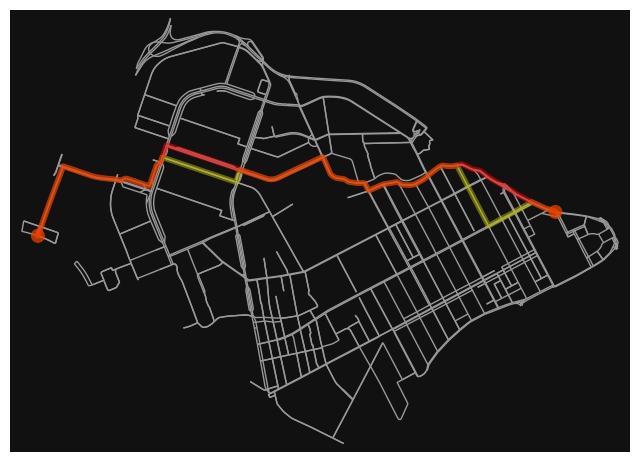

In [91]:
from numpy import load
data = load('traffic_9_10_month.npz')
lst = data.files
#for item in lst:
    #print(item)
    #print(data[item])   
speeds = data['arr_0']
time = data['arr_1']
date = data['arr_2']
weekday = data['arr_3']

transport_graph1 = ox.load_graphml('drive_2.graphml')
transport_graph2 = ox.load_graphml('drive_7.graphml')

n1, e1 = ox.graph_to_gdfs(transport_graph1)
n2, e2 = ox.graph_to_gdfs(transport_graph2)

#e1['speed'] = speeds[5+48*10]
#e2['speed'] = speeds[18+48*14]

e1['travel_time'] = 0
e2['travel_time'] = 0
for i in range(len(e1)):
    e1['travel_time'].iloc[i] = e1['length'].iloc[i]/(float(e1['speed'].iloc[i])*(1000/60))
    e2['travel_time'].iloc[i] = e2['length'].iloc[i]/(float(e2['speed'].iloc[i])*(1000/60))
    e1['weight'].iloc[i] = e1['length'].iloc[i]/(float(e1['speed'].iloc[i])*(1000/60))
    e2['weight'].iloc[i] = e2['length'].iloc[i]/(float(e2['speed'].iloc[i])*(1000/60))
    
T1 = ox.graph_from_gdfs(n1, e1)
T2 = ox.graph_from_gdfs(n2, e2)

origin_edges = ox.nearest_edges(T1, 348859.015, 6648442.978)
destination_edges = ox.nearest_edges(T1, 343359.015, 6648142.97)

shortest_route_by_time1 = ox.shortest_path(T1, origin_edges[0], destination_edges[0], weight='travel_time')
shortest_route_by_time2 = ox.shortest_path(T2, origin_edges[0], destination_edges[0], weight='travel_time')

routes = [shortest_route_by_time1, shortest_route_by_time2]
fig, ax = ox.plot_graph_routes(G, routes, route_colors=['y','r'], show=False, close=False, route_color='r', route_linewidth=3, node_size=0)

travel_time1 = nx.shortest_path_length(T1, origin_edges[0], destination_edges[0], weight='travel_time')
travel_time2 = nx.shortest_path_length(T2, origin_edges[0], destination_edges[0], weight='travel_time')
print(f"Время в пути в первом случае: {round(travel_time1)} минут")
print(f"Время в пути во втором случае: {round(travel_time2)} минут")
plt.show()

In [101]:
import blocksnet as bn
import pyarrow.parquet as p
from blocksnet import CityModel

from blocksnet.preprocessing import DataGetter, AggregateParameters
import os
aggregated_blocks = gpd.read_parquet(os.path.join('blocks_cutter_result.parquet'))
getter = DataGetter(blocks=aggregated_blocks)
accessibility_matrix1 = getter.get_accessibility_matrix(T1)
accessibility_matrix2 = getter.get_accessibility_matrix(T2)

OutMultiEdgeDataView([(223631, 763448262, {'osmid': 192137871, 'oneway': True, 'lanes': '2', 'name': 'набережная Макарова', 'highway': 'secondary', 'maxspeed': 'RU:urban', 'reversed': False, 'length': 21.732, 'weight': 0.28976, 'transport_type': 'drive', 'geometry': <LINESTRING (348611.657 6648539.634, 348592.303 6648549.669)>, 'speed': '4.5', 'travel_time': 0.28976}), (763448262, 3639158309, {'osmid': 60981084, 'oneway': True, 'name': 'Средний проспект В.О.', 'highway': 'residential', 'maxspeed': 'RU:urban', 'reversed': False, 'length': 6.964, 'weight': 0.051585185185185185, 'transport_type': 'drive', 'geometry': <LINESTRING (348592.303 6648549.669, 348588.653 6648543.72)>, 'speed': '8.1', 'travel_time': 0.051585185185185185}), (763448262, 1833317419, {'osmid': [763743931, 285257335], 'oneway': True, 'lanes': ['2', '3'], 'name': 'набережная Макарова', 'highway': 'secondary', 'maxspeed': 'RU:urban', 'reversed': False, 'length': 242.279, 'weight': 2.0189916666666665, 'transport_type': '

In [28]:
from numpy import load
data = load('traffic_9_10_month.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])   
speeds = data['arr_0']
time = data['arr_1']
date = data['arr_2']
weekday = data['arr_3']

arr_0
[[44.1  45.   45.   ... 44.1  44.55 43.65]
 [44.55 44.55 43.65 ... 45.   43.65 44.55]
 [44.55 43.65 44.1  ... 45.   43.65 44.55]
 ...
 [40.95 38.7  38.7  ... 40.95 40.5  41.4 ]
 [42.75 41.4  42.75 ... 41.85 42.75 41.85]
 [43.65 44.1  45.   ... 43.65 43.65 44.55]]
arr_1
['00:00' '00:30' '01:00' ... '22:30' '23:00' '23:30']
arr_2
['01-09-2023' '01-09-2023' '01-09-2023' ... '27-10-2023' '27-10-2023'
 '27-10-2023']
arr_3
['Fri' 'Fri' 'Fri' ... 'Fri' 'Fri' 'Fri']


In [43]:
speeds

array([[44.1 , 45.  , 45.  , ..., 44.1 , 44.55, 43.65],
       [44.55, 44.55, 43.65, ..., 45.  , 43.65, 44.55],
       [44.55, 43.65, 44.1 , ..., 45.  , 43.65, 44.55],
       ...,
       [40.95, 38.7 , 38.7 , ..., 40.95, 40.5 , 41.4 ],
       [42.75, 41.4 , 42.75, ..., 41.85, 42.75, 41.85],
       [43.65, 44.1 , 45.  , ..., 43.65, 43.65, 44.55]])